# HW7 - Feature Engineering (FE) & EDA Assignment
* __Zhenyu Wang__
* __UNI: zw2847__

# Table of Contents
- [Section 1: Data Preparation](#section-1)
- [Section 2: EDA](#section-2)
- [Section 3: Improved Feature](#section-3)
 - [Feature 1: Identify Average total payment extremely higher than state average payment by each state](#section-3-1)
 - [Feature 2: Identify average total payment extremely higher than state average payment on same DRG by each state](#section-3-2)
 - [Feature 3: Identify charged average total payment extremely higher than state average payment on smae DRG by each zipcode](#section-3-3)
 - [Feature 4: Identify Average DRG frequency in each state](#section-3-4)
 - [Feature 5: Identify Provider Average Discharge Numbers in Each State](#section-3-5)
 - [Feature 6: Identify Type of DRG recorded for each Provider](#section-3-6)
 - [Feature 7: Identify Average Total Payment Standard Deviation of each Provider](#section-3-7)
 - [Feature 8: Identify Average payment per discharge of each DRG by Provider](#section-3-8)
 - [Feature 9: Identify Discharge to DRG Ratio per Provider](#section-3-9)
 - [Feature 10: Identify DRG counts by City](#section-3-10)
 
- [Section 4: Modeling](#section-4)
 - [Autoencoder Model](#section-4-1)
   - [Model 1](#section-4-1-1)
   - [Model 2](#section-4-1-2)
   - [Aggregating Multiple Models using Average Method](#section-4-1-3)
 - [iForest Model](#section-4-2)
   - [Model 1](#section-4-2-1)
   - [Model 2](#section-4-2-2)
   - [Aggregating Multiple Models using Average Method](#section-4-2-3)

## Section 1: Data Preparation <a class="anchor" id="section-1"></a>

> Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

> Load the dataset

In [2]:
df = pd.read_csv("inpatientCharges.csv")
df.head()

DRG Definition  Provider Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   

                      Provider Name     Provider Street Address Provider City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider State  Provider Zip Code Hospital Referral Region Description  \
0             AL              36301                          AL - Dothan   
1             AL              35957                      AL - Birmingham   
2             AL              35631                      AL - Birmingham   
3             AL              35235                      AL - Birmingham   
4             AL              35007                      AL - Birmingham   

    Total Discharges   Average Covered Charges   Average Total Payments   \
0                  91                 $32963.07                 $5777.24   
1                  14                 $15131.85                 $5787.57   
2                  24                 $37560.37                 $5434.95   
3                  25                 $13998.28                 $5417.56   
4                  18                 $31633.27                 $5658.33   

  Average Medicare Payments  
0                  $4763.73  
1                  $4976.71  
2                  $4453.79  
3                  $4129.16  
4                  $4851.44

> Summary statistics for the dataset

In [3]:
print(df.shape)

(163065, 12)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   DRG Definition                        163065 non-null  object
 1   Provider Id                           163065 non-null  int64 
 2   Provider Name                         163065 non-null  object
 3   Provider Street Address               163065 non-null  object
 4   Provider City                         163065 non-null  object
 5   Provider State                        163065 non-null  object
 6   Provider Zip Code                     163065 non-null  int64 
 7   Hospital Referral Region Description  163065 non-null  object
 8    Total Discharges                     163065 non-null  int64 
 9    Average Covered Charges              163065 non-null  object
 10   Average Total Payments               163065 non-null  object
 11  Average Medic

In [5]:
# Check for missing values
print(df.isnull().sum())

DRG Definition                          0
Provider Id                             0
Provider Name                           0
Provider Street Address                 0
Provider City                           0
Provider State                          0
Provider Zip Code                       0
Hospital Referral Region Description    0
 Total Discharges                       0
 Average Covered Charges                0
 Average Total Payments                 0
Average Medicare Payments               0
dtype: int64


In [6]:
# Rename Columns
df.columns = ['DRG','Provider_Id', 'Provider_Name','Provider_StreetAddress','Provider_City',
               'Provider_State','Provider_Zipcode','Hospital_referral_region_desp',
                'Total_Discharges','Average_Covered_Charges','Average_Total_Payments',
                'Average_Medicare_Payment']
df = df.drop('Average_Covered_Charges',axis=1)

In [7]:
df.head()

DRG  Provider_Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   

                      Provider_Name      Provider_StreetAddress Provider_City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider_State  Provider_Zipcode Hospital_referral_region_desp  \
0             AL             36301                   AL - Dothan   
1             AL             35957               AL - Birmingham   
2             AL             35631               AL - Birmingham   
3             AL             35235               AL - Birmingham   
4             AL             35007               AL - Birmingham   

   Total_Discharges Average_Total_Payments Average_Medicare_Payment  
0                91               $5777.24                 $4763.73  
1                14               $5787.57                 $4976.71  
2                24               $5434.95                 $4453.79  
3                25               $5417.56                 $4129.16  
4                18               $5658.33                 $4851.44

In [8]:
# Distribution plots of average total payments 
df['Average_Total_Payments'].describe()

count       163065
unique      147842
top       $4370.00
freq             9
Name: Average_Total_Payments, dtype: object

In [9]:
import warnings

# Mute warnings
warnings.filterwarnings('ignore')

# Change data type and transfer spending amount with dollar sign into numeric
df['DRG'] = df['DRG'].astype('category')
df['Provider_State'] = df['Provider_State'].astype('category')
df['Provider_City'] = df['Provider_City'].astype('category')
df['Provider_Id'] = df['Provider_Id'].astype('category')
df['Average_Total_Payments'] = (df['Average_Total_Payments']
                              .str.replace(r'[^-+\d.]', '').astype(float))
df['Average_Medicare_Payment'] = (df['Average_Medicare_Payment']
                              .str.replace(r'[^-+\d.]', '').astype(float))

# Unmute warnings (if needed)
#warnings.filterwarnings('default')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   DRG                            163065 non-null  category
 1   Provider_Id                    163065 non-null  category
 2   Provider_Name                  163065 non-null  object  
 3   Provider_StreetAddress         163065 non-null  object  
 4   Provider_City                  163065 non-null  category
 5   Provider_State                 163065 non-null  category
 6   Provider_Zipcode               163065 non-null  int64   
 7   Hospital_referral_region_desp  163065 non-null  object  
 8   Total_Discharges               163065 non-null  int64   
 9   Average_Total_Payments         163065 non-null  float64 
 10  Average_Medicare_Payment       163065 non-null  float64 
dtypes: category(4), float64(2), int64(2), object(3)
memory usage: 9.9+ MB


## Section 2: EDA <a class="anchor" id="section-2"></a>

>  Distribution of `Total Discharge`

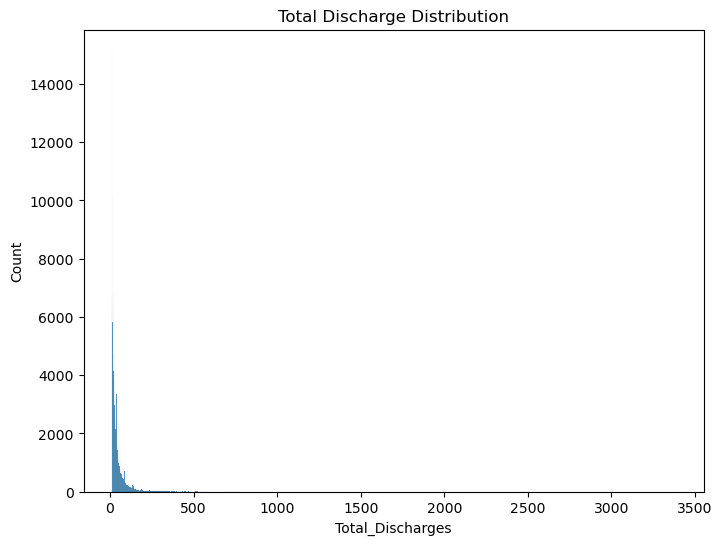

In [11]:
plt.figure(figsize = (8,6))
sns.histplot(df['Total_Discharges'])
plt.title('Total Discharge Distribution')
plt.show()

> Distribution of `Average_Total_Payment`

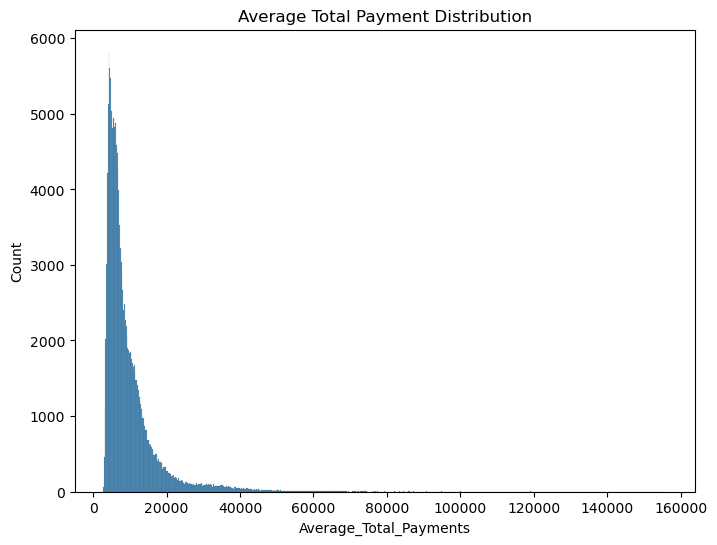

In [12]:
plt.figure(figsize = (8,6))
sns.histplot(df['Average_Total_Payments'])
plt.title('Average Total Payment Distribution')
plt.show()

> Number of `discharges` by state

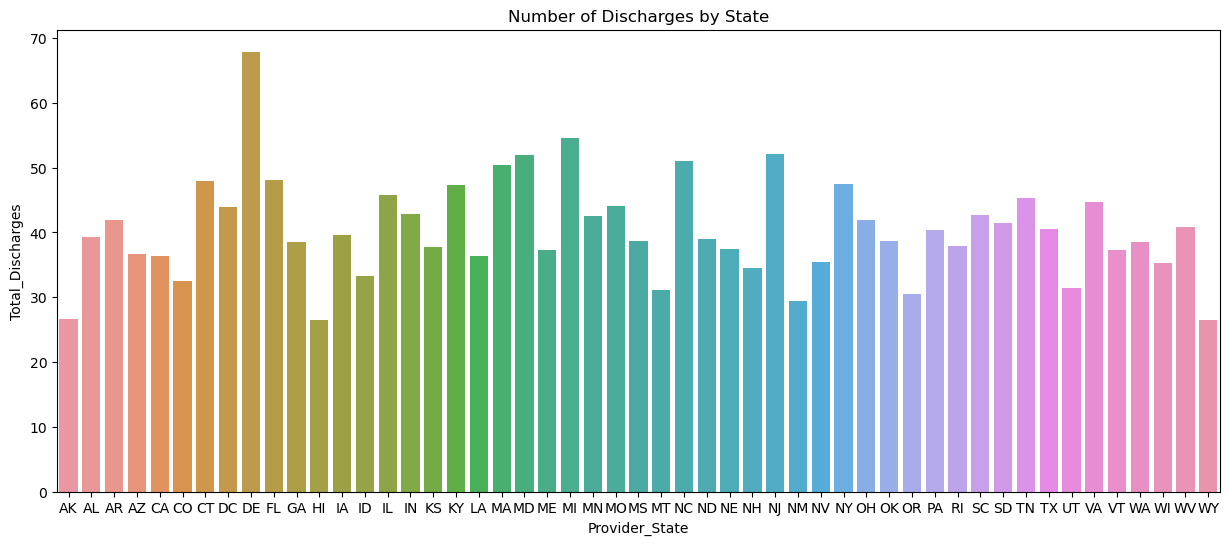

In [13]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Provider_State', y = 'Total_Discharges', data = df, ci = None)
plt.title('Number of Discharges by State')
plt.show()

> Number of `Provider` in each state
- From this histogram, California, Texas, and Florid has the highest number of hospital divisions.

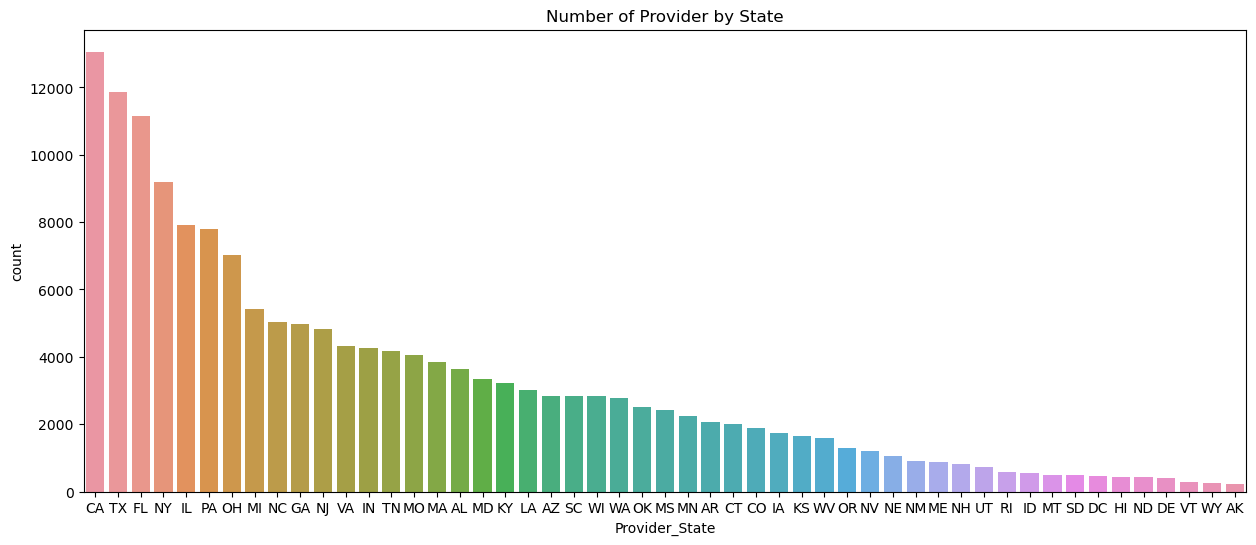

In [14]:
plt.figure(figsize = (15,6))
sns.countplot(x = 'Provider_State',  data = df, order = df['Provider_State'].value_counts().index)
plt.title('Number of Provider by State')
plt.show()

> `Average_Total_Payments` of each state

In [15]:
avg_payment_state = df.groupby('Provider_State')['Average_Total_Payments'].mean().reset_index()
avg_payment_state.columns = ['Provider_State', 'Avg_Payment_State']

# Sort the DataFrame by 'Avg_Payment_State' in descending order
avg_payment_state_sorted = avg_payment_state.sort_values(by='Avg_Payment_State', ascending=False)

# Take the top 10 states
top_10_states = avg_payment_state_sorted.head(10)

# Display the top 10 states

print("Average_Total_Payments in top 10 states:\n\n",top_10_states)

Average_Total_Payments in top 10 states:

    Provider_State  Avg_Payment_State
0              AK       14572.391732
7              DC       12998.029416
11             HI       12775.739525
4              CA       12629.668472
20             MD       12608.947664
34             NY       11795.492052
46             VT       11766.304481
50             WY       11398.485911
6              CT       11365.450671
31             NJ       10678.988647


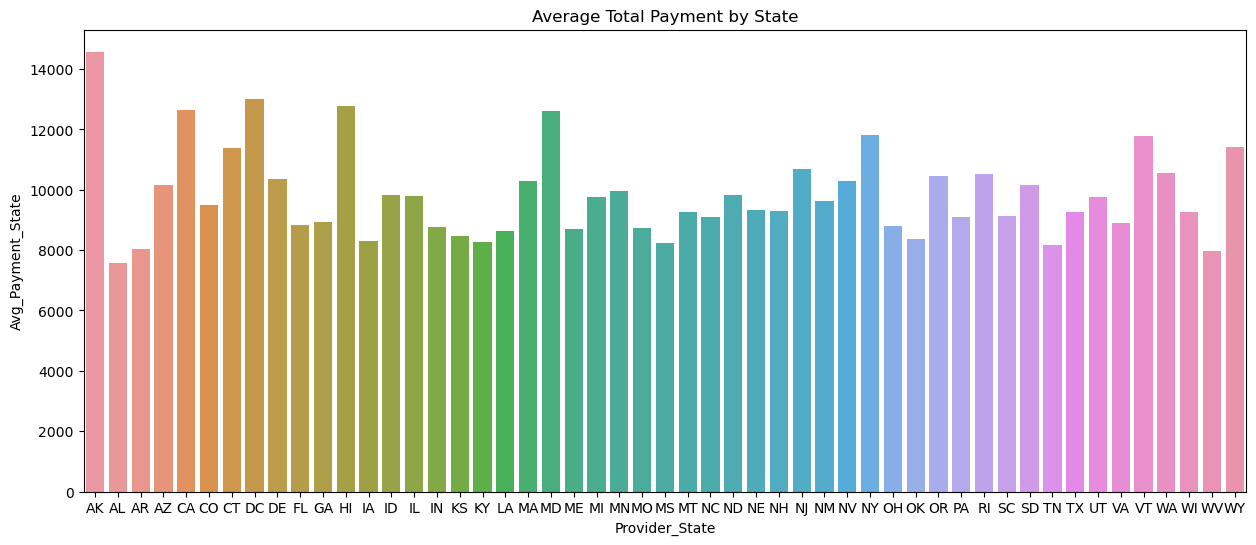

In [16]:
plt.figure(figsize = (15,6))
sns.barplot(x = 'Provider_State', y = 'Avg_Payment_State', data = avg_payment_state)
plt.title('Average Total Payment by State')
plt.show()

> Maximum `Average_Total_Payment` of each State

In [17]:
max_payment_state = df.groupby('Provider_State')['Average_Total_Payments'].max().reset_index()
max_payment_state.columns = ['Provider_State', 'Max_Payment_State']

# Sort the DataFrame by 'Max_Payment_State' in descending order
max_payment_state_sorted = max_payment_state.sort_values(by='Max_Payment_State', ascending=False)

# Display the top 10 states with the highest maximum payments
top_10_max_payment_states = max_payment_state_sorted.head(10)
print("Top 10 states with the highest maximum payments:\n\n",top_10_max_payment_states)

Top 10 states with the highest maximum payments:

    Provider_State  Max_Payment_State
4              CA          156158.18
34             NY          140255.26
15             IN          131187.35
38             PA          100018.33
40             SC           99307.30
7              DC           99067.50
20             MD           95868.64
37             OR           94904.21
43             TX           90701.58
14             IL           85987.00


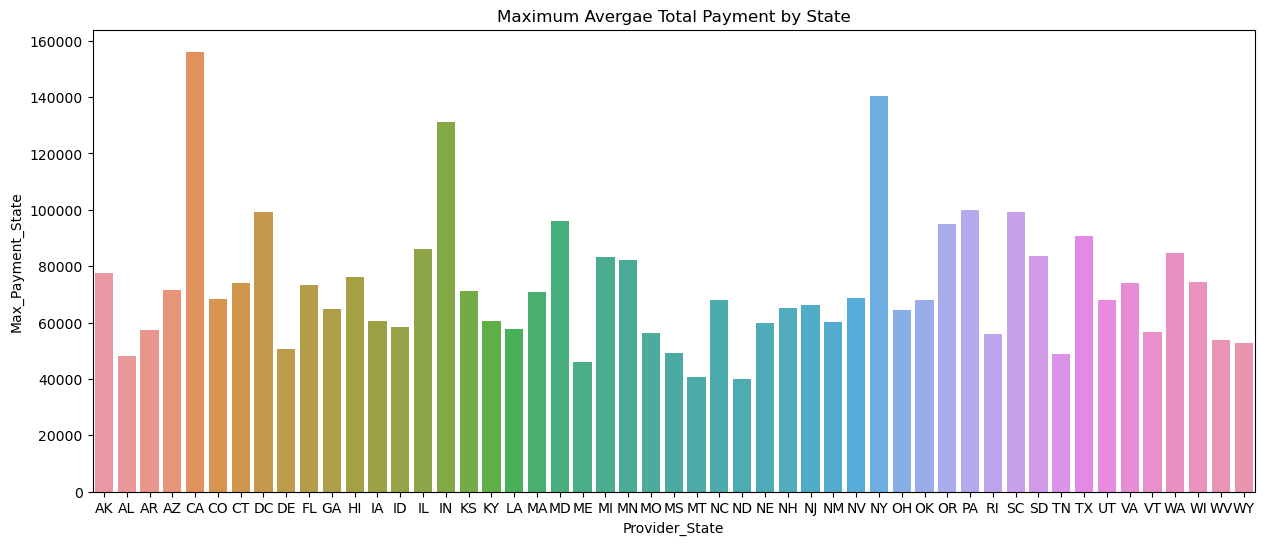

In [18]:
plt.figure(figsize = (15,6))
sns.barplot(x = 'Provider_State', y = 'Max_Payment_State', data = max_payment_state)
plt.title('Maximum Avergae Total Payment by State')
plt.show()

- **Note:** In comparison to their average total payments, it is noteworthy that California (CA), New York (NY), and Indiana (IN) exhibit remarkably high maximum total payment figures. These unusually high payment amounts could potentially be indicative of fraudulent activity.

> `DRG` Distribution

In [19]:
DRG_discharges = df.groupby('DRG')['Total_Discharges'].sum().reset_index()
DRG_discharges.columns= ['DRG', 'Num_Discharges']
DRG_discharges['DRG'] = DRG_discharges['DRG'].str[:3]
DRG_discharges_sorted = DRG_discharges.sort_values(by='Num_Discharges', ascending=False)

# Display the top 10 DRGs with the highest total discharges
print("Top 10 DRGs with the highest total discharges:")
top_10_DRGs = DRG_discharges_sorted.head(10)
top_10_DRGs

Top 10 DRGs with the highest total discharges:


DRG  Num_Discharges
68  470          427207
93  871          319072
61  392          244854
39  292          222038
86  690          206695
17  194          198390
38  291          185599
81  641          153660
83  683          150444
13  190          149677

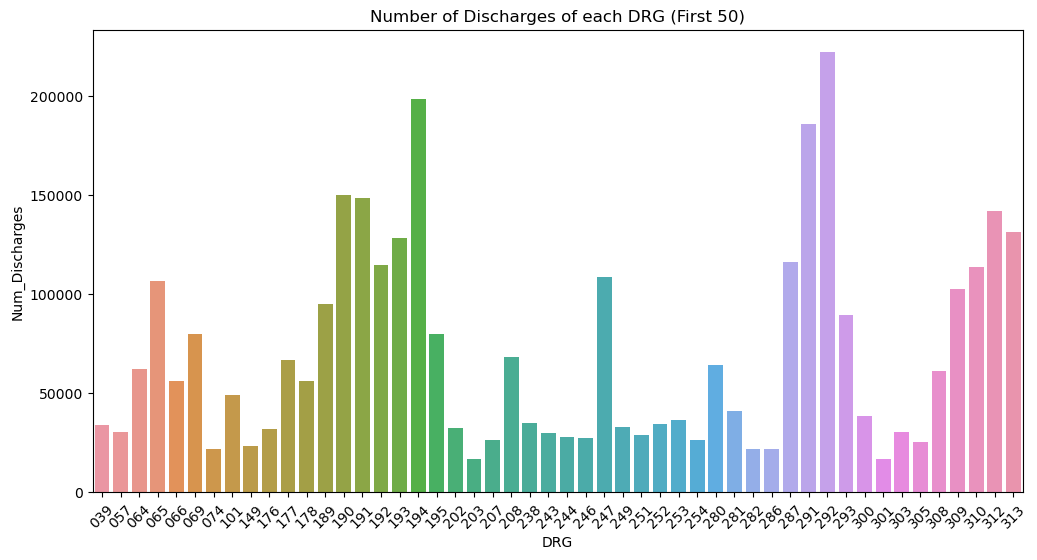

In [20]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'DRG', y = 'Num_Discharges', data = DRG_discharges[:50])
plt.xticks(rotation = 45)
plt.title('Number of Discharges of each DRG (First 50)')
plt.show()

## Section 3: Feature Engineering <a class="anchor" id="section-3"></a>

> **Feature 1:**<a class="anchor" id="section-3-1"></a>  Identify Average total payment extremely higher than state average payment by each state
- During my exploratory data analysis (EDA), I observed that certain states have providers who charge significantly higher maximum total payments, while their average total payments are relatively low compared to other states. Therefore, I am currently investigating which healthcare providers are responsible for these high payments. To identify these outliers, I am using Tukey's fences, specifically, Q3 + 1.5 times the interquartile range (IQR), to identify extreme high payment cases.

In [21]:
charge_state = df.groupby('Provider_State')['Average_Total_Payments']

Q1 = charge_state.quantile(0.25)
Q3 = charge_state.quantile(0.75)
IQR = Q3 - Q1

upper_fence_charge_state = Q3 + 1.5*IQR
upper_fence_charge_state.head()

Provider_State
AK    30282.2475
AL    15842.3850
AR    17526.7600
AZ    21814.9000
CA    26352.5625
Name: Average_Total_Payments, dtype: float64

In [22]:
df_new = pd.merge(df, upper_fence_charge_state.rename('Charge_Upper_Fence_State'), left_on='Provider_State', right_index=True)

df_new.head()

DRG Provider_Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10016   

                      Provider_Name      Provider_StreetAddress Provider_City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider_State  Provider_Zipcode Hospital_referral_region_desp  \
0             AL             36301                   AL - Dothan   
1             AL             35957               AL - Birmingham   
2             AL             35631               AL - Birmingham   
3             AL             35235               AL - Birmingham   
4             AL             35007               AL - Birmingham   

   Total_Discharges  Average_Total_Payments  Average_Medicare_Payment  \
0                91                 5777.24                   4763.73   
1                14                 5787.57                   4976.71   
2                24                 5434.95                   4453.79   
3                25                 5417.56                   4129.16   
4                18                 5658.33                   4851.44   

   Charge_Upper_Fence_State  
0                 15842.385  
1                 15842.385  
2                 15842.385  
3                 15842.385  
4                 15842.385

In [23]:
# Using one hot encoding to create new feature
df_new['anomly_state_avg_payment'] = (df_new['Average_Total_Payments'] > df_new['Charge_Upper_Fence_State']).astype(int)

df_new.head()

DRG Provider_Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10016   

                      Provider_Name      Provider_StreetAddress Provider_City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider_State  Provider_Zipcode Hospital_referral_region_desp  \
0             AL             36301                   AL - Dothan   
1             AL             35957               AL - Birmingham   
2             AL             35631               AL - Birmingham   
3             AL             35235               AL - Birmingham   
4             AL             35007               AL - Birmingham   

   Total_Discharges  Average_Total_Payments  Average_Medicare_Payment  \
0                91                 5777.24                   4763.73   
1                14                 5787.57                   4976.71   
2                24                 5434.95                   4453.79   
3                25                 5417.56                   4129.16   
4                18                 5658.33                   4851.44   

   Charge_Upper_Fence_State  anomly_state_avg_payment  
0                 15842.385                         0  
1                 15842.385                         0  
2                 15842.385                         0  
3                 15842.385                         0  
4                 15842.385                         0

<AxesSubplot:xlabel='Provider_State', ylabel='anomly_state_avg_payment'>

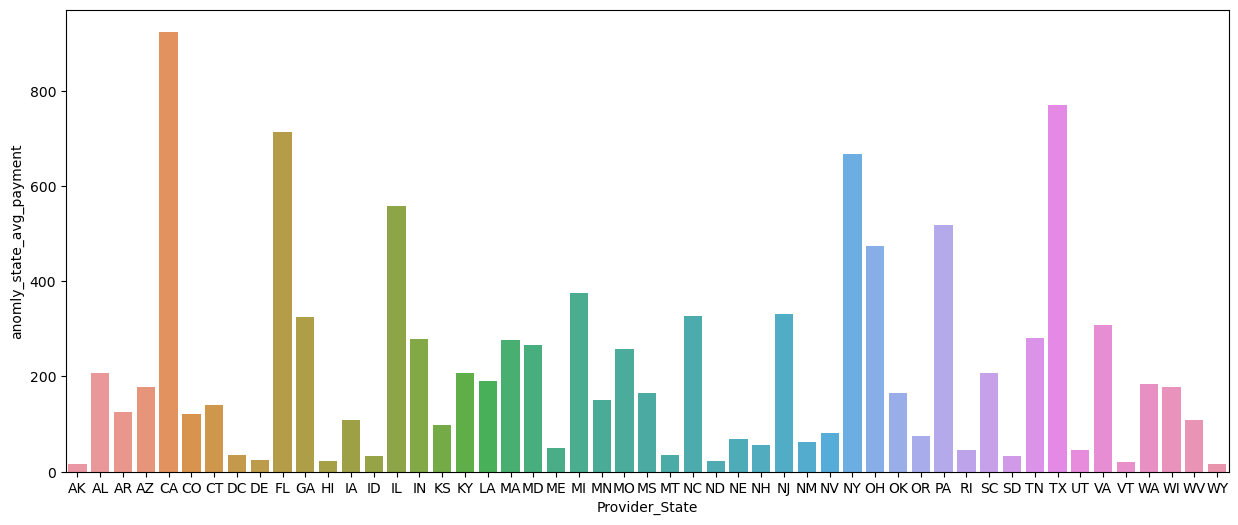

In [24]:
anomaly_payment_state_count = df_new.groupby('Provider_State')['anomly_state_avg_payment'].sum().reset_index()
anomaly_payment_state_count.column = ['Provider_State', 'anomly_state_avg_payment']

plt.figure(figsize= (15,6))
sns.barplot(x = 'Provider_State', y = 'anomly_state_avg_payment', data = anomaly_payment_state_count)

- **Insight:** We can see that numerous states exhibit healthcare providers with exceptionally high payment amounts compared to their respective state averages, notably in California, Texas, Florida, and New York. The presence of such outliers in these states raises concerns about potential healthcare fraud, necessitating further investigation and detection efforts.

> **Feature 2:**<a class="anchor" id="section-3-2"></a> Identify average total payment extremely higher than state average payment on same DRG by each state
- Providers may contend that their patients' conditions are more severe than those at other hospitals within the same state. Therefore, I intend to establish extreme benchmarks based on each Diagnosis-Related Group (DRG), as these groups theoretically represent diseases with similar associated costs.

In [25]:
charge_state_drg = df.groupby(['Provider_State', 'DRG'])['Average_Total_Payments']

Q1 = charge_state_drg.quantile(0.25)
Q3 = charge_state_drg.quantile(0.75)
IQR = Q3 - Q1

upper_fence_charge_state_drg = Q3 + 1.5*IQR
upper_fence_charge_state_drg.head()

Provider_State  DRG                                                            
AK              039 - EXTRACRANIAL PROCEDURES W/O CC/MCC                            8401.95000
                057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC                 8799.00000
                064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC         29277.99000
                065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC          19543.33750
                066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC    14344.01375
Name: Average_Total_Payments, dtype: float64

In [26]:
df_new = pd.merge(df_new, upper_fence_charge_state_drg.rename('Charge_Upper_Fence_State_drg'), left_on=['Provider_State', 'DRG'], right_on=['Provider_State', 'DRG'])

df_new.head()

DRG Provider_Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10016   

                      Provider_Name      Provider_StreetAddress Provider_City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider_State  Provider_Zipcode Hospital_referral_region_desp  \
0             AL             36301                   AL - Dothan   
1             AL             35957               AL - Birmingham   
2             AL             35631               AL - Birmingham   
3             AL             35235               AL - Birmingham   
4             AL             35007               AL - Birmingham   

   Total_Discharges  Average_Total_Payments  Average_Medicare_Payment  \
0                91                 5777.24                   4763.73   
1                14                 5787.57                   4976.71   
2                24                 5434.95                   4453.79   
3                25                 5417.56                   4129.16   
4                18                 5658.33                   4851.44   

   Charge_Upper_Fence_State  anomly_state_avg_payment  \
0                 15842.385                         0   
1                 15842.385                         0   
2                 15842.385                         0   
3                 15842.385                         0   
4                 15842.385                         0   

   Charge_Upper_Fence_State_drg  
0                      6611.905  
1                      6611.905  
2                      6611.905  
3                      6611.905  
4                      6611.905

In [27]:
# Using one hot encoding to create new feature
df_new['anomly_state_drg_avg_payment'] = (df_new['Average_Total_Payments'] > df_new['Charge_Upper_Fence_State_drg']).astype(int)

df_new.head()

DRG Provider_Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10016   

                      Provider_Name      Provider_StreetAddress Provider_City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider_State  Provider_Zipcode Hospital_referral_region_desp  \
0             AL             36301                   AL - Dothan   
1             AL             35957               AL - Birmingham   
2             AL             35631               AL - Birmingham   
3             AL             35235               AL - Birmingham   
4             AL             35007               AL - Birmingham   

   Total_Discharges  Average_Total_Payments  Average_Medicare_Payment  \
0                91                 5777.24                   4763.73   
1                14                 5787.57                   4976.71   
2                24                 5434.95                   4453.79   
3                25                 5417.56                   4129.16   
4                18                 5658.33                   4851.44   

   Charge_Upper_Fence_State  anomly_state_avg_payment  \
0                 15842.385                         0   
1                 15842.385                         0   
2                 15842.385                         0   
3                 15842.385                         0   
4                 15842.385                         0   

   Charge_Upper_Fence_State_drg  anomly_state_drg_avg_payment  
0                      6611.905                             0  
1                      6611.905                             0  
2                      6611.905                             0  
3                      6611.905                             0  
4                      6611.905                             0

<AxesSubplot:xlabel='Provider_State', ylabel='anomly_state_drg_avg_payment'>

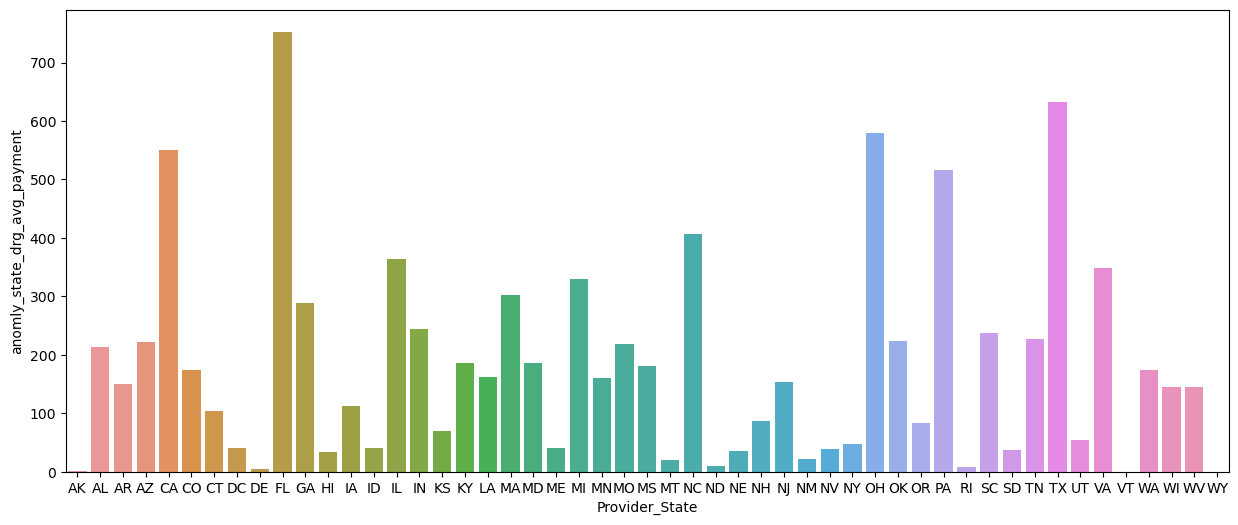

In [28]:
anomaly_payment_state_drg_count = df_new.groupby('Provider_State')['anomly_state_drg_avg_payment'].sum().reset_index()
anomaly_payment_state_drg_count.column = ['Provider_State', 'anomly_state_drg_avg_payment']

plt.figure(figsize= (15,6))
sns.barplot(x = 'Provider_State', y = 'anomly_state_drg_avg_payment', data = anomaly_payment_state_drg_count)

- **Insight:** The previous results reveal some significant variations, providing evidence of price disparities among different Diagnosis-Related Group (DRG) treatments. Upon accounting for the varying costs associated with these DRGs, it appears that states such as Alaska (AK), Vermont (VT), and Wyoming (WY) have minimal potential for fraud. Notably, California (CA) now shows a lower potential for fraud when compared to the analysis that did not consider DRG types. This suggests that providers in CA may typically offer treatments with higher actual costs. However, it is essential to consider the possibility of potential fraud, where CA providers might exaggerate medical conditions to encourage patients to choose more expensive treatments, rather than merely charging higher prices for standard treatments.

> **Feature 3:**<a class="anchor" id="section-3-3"></a> Identify charged average total payment extremely higher than state average payment on smae DRG by each zipcode
- Similar to the previous feature, this one refines the comparison range from entire states to specific zip codes, aiming to establish a more precise benchmark for fraud detection.

In [29]:
charge_zip_drg = df.groupby(['Provider_Zipcode', 'DRG'])['Average_Total_Payments']

Q1 = charge_zip_drg.quantile(0.25)
Q3 = charge_zip_drg.quantile(0.75)
IQR = Q3 - Q1

upper_fence_charge_zip_drg = Q3 + 1.5*IQR

# Merge the upper fences back to original df
df_new = pd.merge(df_new, upper_fence_charge_zip_drg.rename('Charge_Upper_Fence_zip_drg'),
                  left_on=['Provider_Zipcode', 'DRG'], right_on=['Provider_Zipcode', 'DRG'])

# Using one hot encoding to create new feature
df_new['anomly_zip_drg_avg_payment'] = (df_new['Average_Total_Payments'] > df_new['Charge_Upper_Fence_zip_drg']).astype(int)

df_new.head()

DRG Provider_Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10016   

                      Provider_Name      Provider_StreetAddress Provider_City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider_State  Provider_Zipcode Hospital_referral_region_desp  \
0             AL             36301                   AL - Dothan   
1             AL             35957               AL - Birmingham   
2             AL             35631               AL - Birmingham   
3             AL             35235               AL - Birmingham   
4             AL             35007               AL - Birmingham   

   Total_Discharges  Average_Total_Payments  Average_Medicare_Payment  \
0                91                 5777.24                   4763.73   
1                14                 5787.57                   4976.71   
2                24                 5434.95                   4453.79   
3                25                 5417.56                   4129.16   
4                18                 5658.33                   4851.44   

   Charge_Upper_Fence_State  anomly_state_avg_payment  \
0                 15842.385                         0   
1                 15842.385                         0   
2                 15842.385                         0   
3                 15842.385                         0   
4                 15842.385                         0   

   Charge_Upper_Fence_State_drg  anomly_state_drg_avg_payment  \
0                      6611.905                             0   
1                      6611.905                             0   
2                      6611.905                             0   
3                      6611.905                             0   
4                      6611.905                             0   

   Charge_Upper_Fence_zip_drg  anomly_zip_drg_avg_payment  
0                     5777.24                           0  
1                     5787.57                           0  
2                     5434.95                           0  
3                     5417.56                           0  
4                     5658.33                           0

- **Insight:** This feature results in a narrower peer comparison for each provider, which provides a more precise reference for determining the normal average total payment. Consequently, it enhances our ability to identify payment anomalies and detect potential instances of fraud more effectively.

> **Feature 4:**<a class="anchor" id="section-3-4"></a> Identify Average DRG frequency in each state
- As previously discussed, fraud can occur not only through the imposition of extra fees but also by consistently employing expensive treatments for various patients. Therefore, we can compute the average Diagnosis-Related Group (DRG) frequency for each state to assess whether providers are making rational treatment choices or not.

In [30]:
drg_avg_freq_state = df.groupby(['Provider_State', 'DRG'])['Total_Discharges'].mean().reset_index()
drg_avg_freq_state.columns =['Provider_State', 'DRG', 'state_avg_drg_frq']

df_new = pd.merge(df_new, drg_avg_freq_state, on = ['Provider_State', 'DRG'])
df_new.head()

DRG Provider_Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10016   

                      Provider_Name      Provider_StreetAddress Provider_City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider_State  Provider_Zipcode Hospital_referral_region_desp  \
0             AL             36301                   AL - Dothan   
1             AL             35957               AL - Birmingham   
2             AL             35631               AL - Birmingham   
3             AL             35235               AL - Birmingham   
4             AL             35007               AL - Birmingham   

   Total_Discharges  Average_Total_Payments  Average_Medicare_Payment  \
0                91                 5777.24                   4763.73   
1                14                 5787.57                   4976.71   
2                24                 5434.95                   4453.79   
3                25                 5417.56                   4129.16   
4                18                 5658.33                   4851.44   

   Charge_Upper_Fence_State  anomly_state_avg_payment  \
0                 15842.385                         0   
1                 15842.385                         0   
2                 15842.385                         0   
3                 15842.385                         0   
4                 15842.385                         0   

   Charge_Upper_Fence_State_drg  anomly_state_drg_avg_payment  \
0                      6611.905                             0   
1                      6611.905                             0   
2                      6611.905                             0   
3                      6611.905                             0   
4                      6611.905                             0   

   Charge_Upper_Fence_zip_drg  anomly_zip_drg_avg_payment  state_avg_drg_frq  
0                     5777.24                           0          38.217391  
1                     5787.57                           0          38.217391  
2                     5434.95                           0          38.217391  
3                     5417.56                           0          38.217391  
4                     5658.33                           0          38.217391

<AxesSubplot:xlabel='Provider_State', ylabel='anomly_drg_freq'>

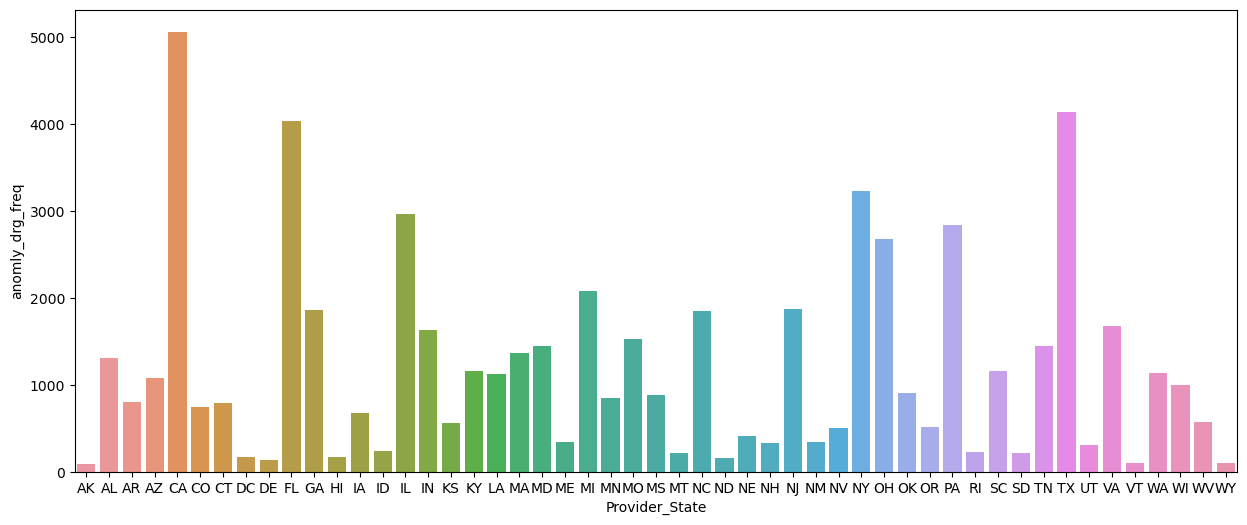

In [31]:
# Using one hot encoding to create new feature
df_new['anomly_drg_freq'] = (df_new['Total_Discharges'] > df_new['state_avg_drg_frq']).astype(int)

anomly_drg_freq_count = df_new.groupby('Provider_State')['anomly_drg_freq'].sum().reset_index()
anomly_drg_freq_count.column = ['Provider_State', 'anomly_drg_freq']

plt.figure(figsize= (15,6))
sns.barplot(x = 'Provider_State', y = 'anomly_drg_freq', data = anomly_drg_freq_count)

- **Insight:** This feature can help us to identify instances of unusually high frequencies for specific Diagnosis-Related Groups (DRGs). It enables us to trace these occurrences back to the respective providers and DRG types, providing valuable insights into the potential reasons behind healthcare fraud.

> **Feature 5:**<a class="anchor" id="section-3-5"></a> Identify Provider Average Discharge Numbers in Each State

In [32]:
state_avg_discharge = df.groupby(['Provider_State'])['Total_Discharges'].mean().astype(int).reset_index()
state_avg_discharge.columns =['Provider_State', 'state_avg_discharge']

df_new = pd.merge(df_new, state_avg_discharge, on = ['Provider_State'])

df_new.head()

DRG Provider_Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10016   

                      Provider_Name      Provider_StreetAddress Provider_City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider_State  Provider_Zipcode Hospital_referral_region_desp  \
0             AL             36301                   AL - Dothan   
1             AL             35957               AL - Birmingham   
2             AL             35631               AL - Birmingham   
3             AL             35235               AL - Birmingham   
4             AL             35007               AL - Birmingham   

   Total_Discharges  Average_Total_Payments  Average_Medicare_Payment  \
0                91                 5777.24                   4763.73   
1                14                 5787.57                   4976.71   
2                24                 5434.95                   4453.79   
3                25                 5417.56                   4129.16   
4                18                 5658.33                   4851.44   

   Charge_Upper_Fence_State  anomly_state_avg_payment  \
0                 15842.385                         0   
1                 15842.385                         0   
2                 15842.385                         0   
3                 15842.385                         0   
4                 15842.385                         0   

   Charge_Upper_Fence_State_drg  anomly_state_drg_avg_payment  \
0                      6611.905                             0   
1                      6611.905                             0   
2                      6611.905                             0   
3                      6611.905                             0   
4                      6611.905                             0   

   Charge_Upper_Fence_zip_drg  anomly_zip_drg_avg_payment  state_avg_drg_frq  \
0                     5777.24                           0          38.217391   
1                     5787.57                           0          38.217391   
2                     5434.95                           0          38.217391   
3                     5417.56                           0          38.217391   
4                     5658.33                           0          38.217391   

   anomly_drg_freq  state_avg_discharge  
0                1                   39  
1                0                   39  
2                0                   39  
3                0                   39  
4                0                   39

<AxesSubplot:xlabel='Provider_State', ylabel='anomly_discharge'>

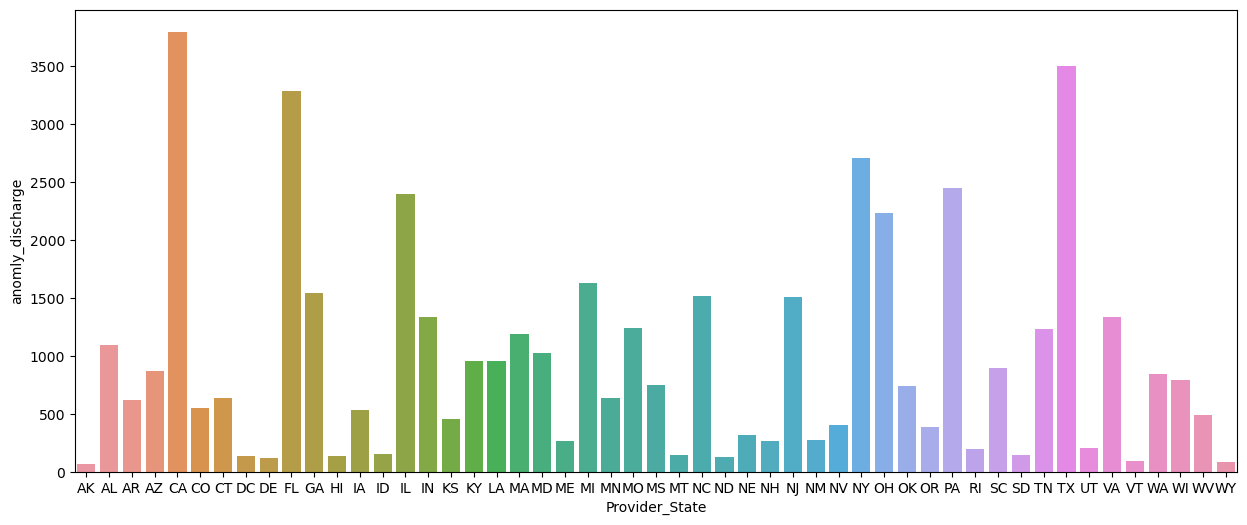

In [33]:
# Using one hot encoding to create new feature
df_new['anomly_discharge'] = (df_new['Total_Discharges'] > df_new['state_avg_discharge']).astype(int)

anomly_drg_freq_count = df_new.groupby('Provider_State')['anomly_discharge'].sum().reset_index()
anomly_drg_freq_count.column = ['Provider_State', 'anomly_discharge']

plt.figure(figsize= (15,6))
sns.barplot(x = 'Provider_State', y = 'anomly_discharge', data = anomly_drg_freq_count)

- **Insight:** This feature enables us to identify providers with higher discharge rates compared to the state's average number, indicating potentially excessive patient visits. Such a pattern may be indicative of non-compliance with the requirement for patients to have genuine reasons for revisiting the clinic in order to bill for multiple visits.

> **Feature 6:**<a class="anchor" id="section-3-6"></a> Identify Type of DRG recorded for each Provider

In [34]:
df_new['Provider_DRG_Count'] = df.groupby('Provider_Id')['DRG'].transform('nunique')
df_new['Provider_DRG_Count_state'] = df.groupby('Provider_State')['DRG'].transform('nunique').mean()
df_new.head()

DRG Provider_Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10016   

                      Provider_Name      Provider_StreetAddress Provider_City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider_State  Provider_Zipcode Hospital_referral_region_desp  \
0             AL             36301                   AL - Dothan   
1             AL             35957               AL - Birmingham   
2             AL             35631               AL - Birmingham   
3             AL             35235               AL - Birmingham   
4             AL             35007               AL - Birmingham   

   Total_Discharges  Average_Total_Payments  ...  \
0                91                 5777.24  ...   
1                14                 5787.57  ...   
2                24                 5434.95  ...   
3                25                 5417.56  ...   
4                18                 5658.33  ...   

   Charge_Upper_Fence_State_drg  anomly_state_drg_avg_payment  \
0                      6611.905                             0   
1                      6611.905                             0   
2                      6611.905                             0   
3                      6611.905                             0   
4                      6611.905                             0   

   Charge_Upper_Fence_zip_drg  anomly_zip_drg_avg_payment  state_avg_drg_frq  \
0                     5777.24                           0          38.217391   
1                     5787.57                           0          38.217391   
2                     5434.95                           0          38.217391   
3                     5417.56                           0          38.217391   
4                     5658.33                           0          38.217391   

   anomly_drg_freq  state_avg_discharge  anomly_discharge  Provider_DRG_Count  \
0                1                   39                 1                  92   
1                0                   39                 0                  49   
2                0                   39                 0                  86   
3                0                   39                 0                  87   
4                0                   39                 0                  80   

   Provider_DRG_Count_state  
0                 99.827688  
1                 99.827688  
2                 99.827688  
3                 99.827688  
4                 99.827688  

[5 rows x 23 columns]

<AxesSubplot:xlabel='Provider_State', ylabel='anomly_drg_type'>

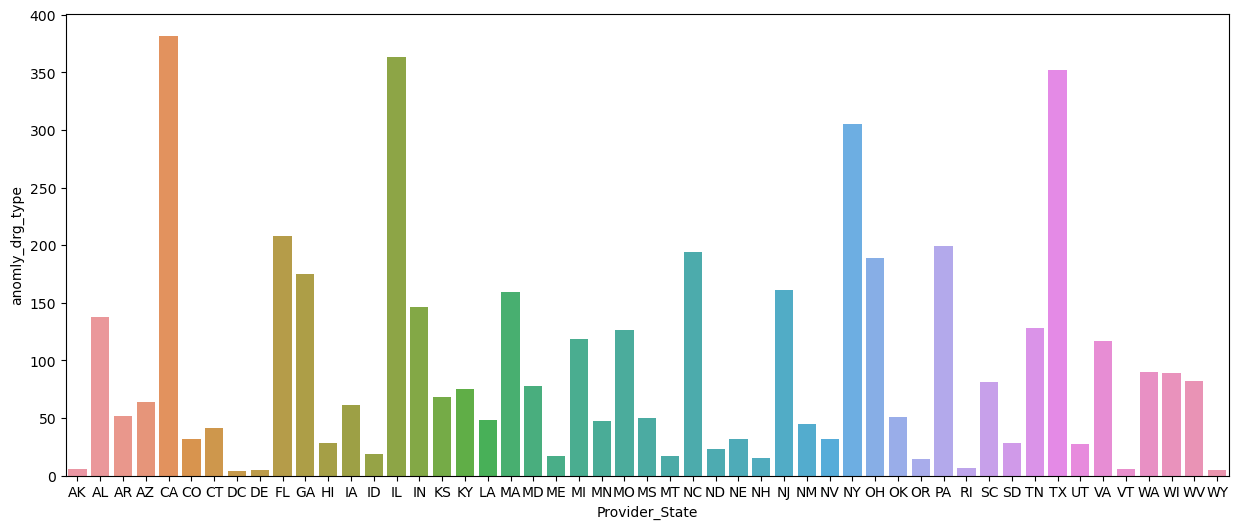

In [35]:
# Using one hot encoding to create new feature
df_new['anomly_drg_type'] = (df_new['Provider_DRG_Count'] > df_new['Provider_DRG_Count_state']).astype(int)

anomly_drg_type = df_new.groupby('Provider_State')['anomly_drg_type'].sum().reset_index()
anomly_drg_type.column = ['Provider_State', 'anomly_drg_type']

plt.figure(figsize= (15,6))
sns.barplot(x = 'Provider_State', y = 'anomly_drg_type', data = anomly_drg_type)

- **Insight:** Assessing the count of unique Diagnosis-Related Groups (DRGs) documented by each provider is essential. Providers displaying an unusually high number of diverse DRGs might be indicative of DRG upcoding. This observation holds particularly true for states like California (CA), Illinois (IL), New York (NY), and Texas (TX).

> **Feature 7:**<a class="anchor" id="section-3-7"></a> Identify Average Total Payment Standard Deviation of each Provider
- A healthcare provider should ideally have a relatively consistent patient group, resulting in stable Diagnosis-Related Groups (DRG) and payment amounts. Therefore, if a provider experiences significant fluctuations in average total payments, it may suggest the possibility of engaging in upcoding or unbundling practices for certain patients.

In [36]:
df_new['Provider_Payment_Standard_Deviation'] = df.groupby('Provider_Id')['Average_Total_Payments'].transform('std')
df_new['Region_Payment_Standard_Deviation'] = df.groupby('Hospital_referral_region_desp')['Average_Total_Payments'].transform('std')
df_new.head()

DRG Provider_Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10016   

                      Provider_Name      Provider_StreetAddress Provider_City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider_State  Provider_Zipcode Hospital_referral_region_desp  \
0             AL             36301                   AL - Dothan   
1             AL             35957               AL - Birmingham   
2             AL             35631               AL - Birmingham   
3             AL             35235               AL - Birmingham   
4             AL             35007               AL - Birmingham   

   Total_Discharges  Average_Total_Payments  ...  anomly_zip_drg_avg_payment  \
0                91                 5777.24  ...                           0   
1                14                 5787.57  ...                           0   
2                24                 5434.95  ...                           0   
3                25                 5417.56  ...                           0   
4                18                 5658.33  ...                           0   

   state_avg_drg_frq  anomly_drg_freq  state_avg_discharge  anomly_discharge  \
0          38.217391                1                   39                 1   
1          38.217391                0                   39                 0   
2          38.217391                0                   39                 0   
3          38.217391                0                   39                 0   
4          38.217391                0                   39                 0   

   Provider_DRG_Count  Provider_DRG_Count_state  anomly_drg_type  \
0                  92                 99.827688                0   
1                  49                 99.827688                0   
2                  86                 99.827688                0   
3                  87                 99.827688                0   
4                  80                 99.827688                0   

   Provider_Payment_Standard_Deviation  Region_Payment_Standard_Deviation  
0                          6038.338768                        4612.285731  
1                          2717.731770                        5410.640598  
2                          5630.866929                        5410.640598  
3                          5546.045094                        5410.640598  
4                          4550.105983                        5410.640598  

[5 rows x 26 columns]

<AxesSubplot:xlabel='Provider_State', ylabel='anomly_payment_std'>

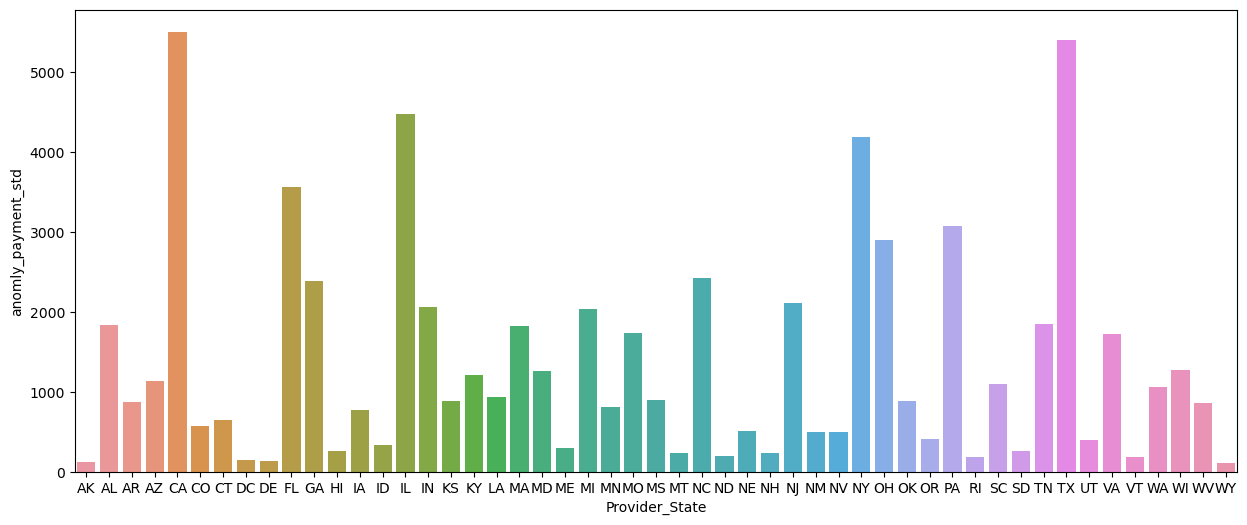

In [37]:
# Using one hot encoding to create new feature
df_new['anomly_payment_std'] = (df_new['Provider_Payment_Standard_Deviation'] >
                                df_new['Region_Payment_Standard_Deviation']).astype(int)

anomly_payment_std = df_new.groupby('Provider_State')['anomly_payment_std'].sum().reset_index()
anomly_payment_std.column = ['Provider_State', 'anomly_payment_std']

plt.figure(figsize= (15,6))

sns.barplot(x = 'Provider_State', y = 'anomly_payment_std', data = anomly_payment_std)

- **Insight:** This feature presents the average total payment for each hospital referral region. Substantial deviations from the regional average could serve as red flags for potential fraud, particularly in states like California (CA), Florida (FL), Illinois (IL), New York (NY), and Texas (TX).

> **Feature 8:**<a class="anchor" id="section-3-8"></a> Identify Average payment per discharge of each DRG by Provider
- It's possible for a scenario to exist where a provider offers appropriate treatments to patients and doesn't require frequent patient visits. However, they might charge higher than the standard price each time the patient returns.

In [38]:
df_new['Payment_per_Discharge_Provider'] = df['Average_Total_Payments'] / df['Total_Discharges']
df_new['Payment_per_Discharge_State'] = df.groupby(['Provider_State', 'DRG'])['Average_Total_Payments'].transform('sum') / df.groupby(['Provider_State', 'DRG'])['Total_Discharges'].transform('sum')
df_new.head()

DRG Provider_Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10016   

                      Provider_Name      Provider_StreetAddress Provider_City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider_State  Provider_Zipcode Hospital_referral_region_desp  \
0             AL             36301                   AL - Dothan   
1             AL             35957               AL - Birmingham   
2             AL             35631               AL - Birmingham   
3             AL             35235               AL - Birmingham   
4             AL             35007               AL - Birmingham   

   Total_Discharges  Average_Total_Payments  ...  state_avg_discharge  \
0                91                 5777.24  ...                   39   
1                14                 5787.57  ...                   39   
2                24                 5434.95  ...                   39   
3                25                 5417.56  ...                   39   
4                18                 5658.33  ...                   39   

   anomly_discharge  Provider_DRG_Count  Provider_DRG_Count_state  \
0                 1                  92                 99.827688   
1                 0                  49                 99.827688   
2                 0                  86                 99.827688   
3                 0                  87                 99.827688   
4                 0                  80                 99.827688   

   anomly_drg_type  Provider_Payment_Standard_Deviation  \
0                0                          6038.338768   
1                0                          2717.731770   
2                0                          5630.866929   
3                0                          5546.045094   
4                0                          4550.105983   

   Region_Payment_Standard_Deviation  anomly_payment_std  \
0                        4612.285731                   1   
1                        5410.640598                   0   
2                        5410.640598                   1   
3                        5410.640598                   1   
4                        5410.640598                   0   

   Payment_per_Discharge_Provider  Payment_per_Discharge_State  
0                       63.486154                   150.287907  
1                      413.397857                   150.287907  
2                      226.456250                   150.287907  
3                      216.702400                   150.287907  
4                      314.351667                   150.287907  

[5 rows x 29 columns]

<AxesSubplot:xlabel='Provider_State', ylabel='anomly_payment_per_discharge'>

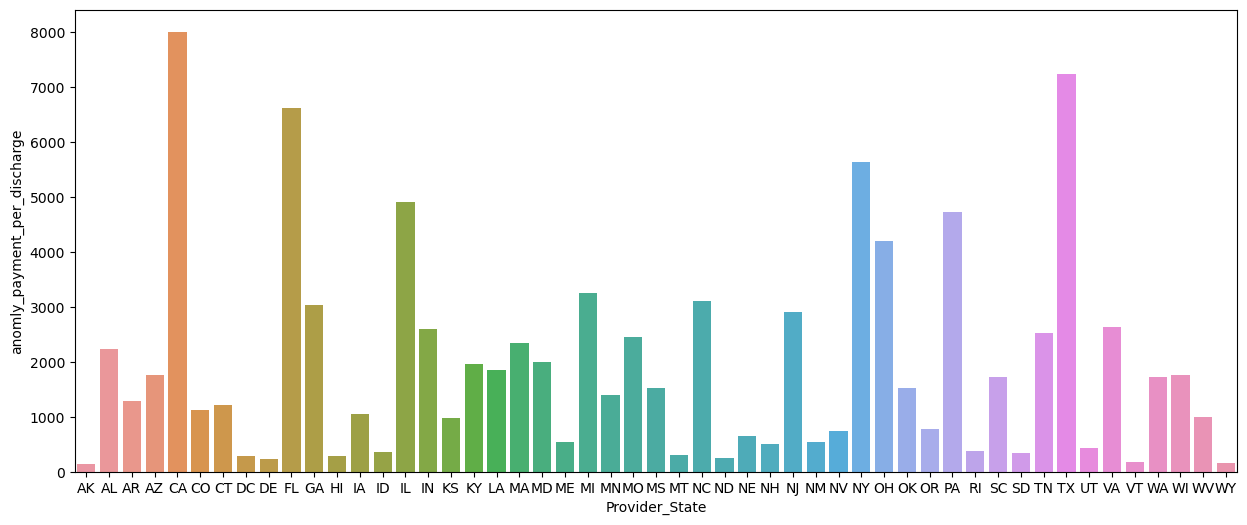

In [39]:
# Using one hot encoding to create new feature
df_new['anomly_payment_per_discharge'] = (df_new['Payment_per_Discharge_Provider'] >
                                df_new['Payment_per_Discharge_State']).astype(int)

anomly_payment_per_discharge = df_new.groupby('Provider_State')['anomly_payment_per_discharge'].sum().reset_index()
anomly_payment_per_discharge.columns = ['Provider_State', 'anomly_payment_per_discharge']

plt.figure(figsize= (15,6))
sns.barplot(x = 'Provider_State', y = 'anomly_payment_per_discharge', data = anomly_payment_per_discharge)

- **Insight:** This is a derived feature obtained by dividing `Average Total Payments` by `Total Discharges`. When a provider's payment per discharge substantially exceeds that of others, it could raise concerns and be considered a potential red flag.

> **Feature 9:**<a class="anchor" id="section-3-9"></a> Identify Discharge to DRG Ratio per Provider
- There is a possibility that providers may engage in upcoding, where they upgrade a standard diagnosis to a more severe one. This results in patients paying higher costs for a typical illness. To identify such fraudulent activities, we can calculate the discharge-to-DRG ratio and examine whether providers are recording more of certain DRGs than the state average.

In [40]:
df_new['Discharge_to_DRG_Ratio_Provider'] = df['Total_Discharges'] / df.groupby('Provider_Id')['DRG'].transform('nunique')
df_new['Discharge_to_DRG_Ratio_State'] = df.groupby(['Provider_State', 'DRG'])['Total_Discharges'].transform(lambda x: x / x.nunique())
df_new.head()

DRG Provider_Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10016   

                      Provider_Name      Provider_StreetAddress Provider_City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider_State  Provider_Zipcode Hospital_referral_region_desp  \
0             AL             36301                   AL - Dothan   
1             AL             35957               AL - Birmingham   
2             AL             35631               AL - Birmingham   
3             AL             35235               AL - Birmingham   
4             AL             35007               AL - Birmingham   

   Total_Discharges  Average_Total_Payments  ...  Provider_DRG_Count_state  \
0                91                 5777.24  ...                 99.827688   
1                14                 5787.57  ...                 99.827688   
2                24                 5434.95  ...                 99.827688   
3                25                 5417.56  ...                 99.827688   
4                18                 5658.33  ...                 99.827688   

   anomly_drg_type  Provider_Payment_Standard_Deviation  \
0                0                          6038.338768   
1                0                          2717.731770   
2                0                          5630.866929   
3                0                          5546.045094   
4                0                          4550.105983   

   Region_Payment_Standard_Deviation  anomly_payment_std  \
0                        4612.285731                   1   
1                        5410.640598                   0   
2                        5410.640598                   1   
3                        5410.640598                   1   
4                        5410.640598                   0   

   Payment_per_Discharge_Provider  Payment_per_Discharge_State  \
0                       63.486154                   150.287907   
1                      413.397857                   150.287907   
2                      226.456250                   150.287907   
3                      216.702400                   150.287907   
4                      314.351667                   150.287907   

   anomly_payment_per_discharge  Discharge_to_DRG_Ratio_Provider  \
0                             0                         0.989130   
1                             1                         0.285714   
2                             1                         0.279070   
3                             1                         0.287356   
4                             1                         0.225000   

   Discharge_to_DRG_Ratio_State  
0                          4.55  
1                          0.70  
2                          1.20  
3                          1.25  
4                          0.90  

[5 rows x 32 columns]

<AxesSubplot:xlabel='Provider_State', ylabel='anomly_Discharge_DRG_ratio'>

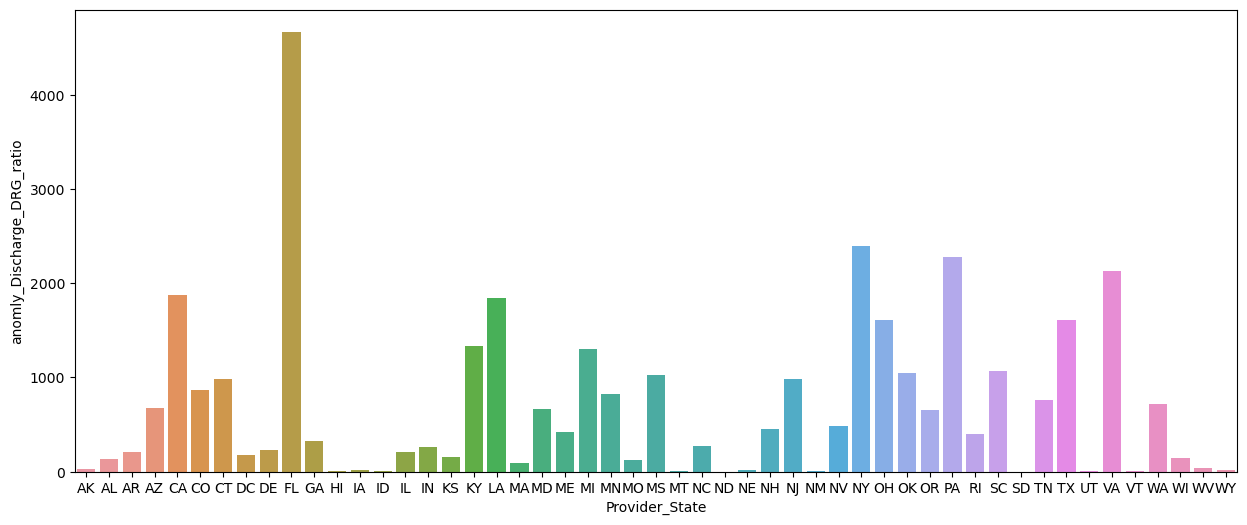

In [41]:
# Using one hot encoding to create new feature
df_new['anomly_Discharge_DRG_ratio'] = (df_new['Discharge_to_DRG_Ratio_Provider'] > df_new['Discharge_to_DRG_Ratio_State']).astype(int)
df_new.head()

anomly_Discharge_DRG_ratio = df_new.groupby('Provider_State')['anomly_Discharge_DRG_ratio'].sum().reset_index()
anomly_Discharge_DRG_ratio.columns = ['Provider_State', 'anomly_Discharge_DRG_ratio']

plt.figure(figsize= (15,6))
sns.barplot(x = 'Provider_State', y = 'anomly_Discharge_DRG_ratio', data = anomly_Discharge_DRG_ratio)

- **Insight:** This feature presents the ratio of discharges to the count of unique Diagnosis-Related Groups (DRGs) for each provider. Providers exhibiting a high ratio might be excessively utilizing specific DRGs. Notably, Florida (FL) stands out with an exceptionally high number of discharges in relation to the number of unique DRGs recorded by each provider.

> **Feature 10:**<a class="anchor" id="section-3-10"></a> Identify DRG counts by City
- Patients within the same city are expected to share similar Diagnosis-Related Groups (DRGs) due to the common environmental factors influencing them. Therefore, when a city exhibits an exceptionally high number of unique DRGs recorded, it raises suspicions regarding potential unbundling practices among the providers in that city.

In [42]:
df_new['City_DRG_Count'] = df.groupby('Provider_City')['DRG'].transform('nunique')
df_new['avg_State_DRG_Count'] = df.groupby('Provider_State')['DRG'].transform('nunique').mean()
df_new.head()

DRG Provider_Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10016   

                      Provider_Name      Provider_StreetAddress Provider_City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider_State  Provider_Zipcode Hospital_referral_region_desp  \
0             AL             36301                   AL - Dothan   
1             AL             35957               AL - Birmingham   
2             AL             35631               AL - Birmingham   
3             AL             35235               AL - Birmingham   
4             AL             35007               AL - Birmingham   

   Total_Discharges  Average_Total_Payments  ...  \
0                91                 5777.24  ...   
1                14                 5787.57  ...   
2                24                 5434.95  ...   
3                25                 5417.56  ...   
4                18                 5658.33  ...   

   Region_Payment_Standard_Deviation  anomly_payment_std  \
0                        4612.285731                   1   
1                        5410.640598                   0   
2                        5410.640598                   1   
3                        5410.640598                   1   
4                        5410.640598                   0   

   Payment_per_Discharge_Provider  Payment_per_Discharge_State  \
0                       63.486154                   150.287907   
1                      413.397857                   150.287907   
2                      226.456250                   150.287907   
3                      216.702400                   150.287907   
4                      314.351667                   150.287907   

   anomly_payment_per_discharge  Discharge_to_DRG_Ratio_Provider  \
0                             0                         0.989130   
1                             1                         0.285714   
2                             1                         0.279070   
3                             1                         0.287356   
4                             1                         0.225000   

   Discharge_to_DRG_Ratio_State  anomly_Discharge_DRG_ratio  City_DRG_Count  \
0                          4.55                           0              95   
1                          0.70                           0              49   
2                          1.20                           0             100   
3                          1.25                           0             100   
4                          0.90                           0              80   

   avg_State_DRG_Count  
0            99.827688  
1            99.827688  
2            99.827688  
3            99.827688  
4            99.827688  

[5 rows x 35 columns]

<AxesSubplot:xlabel='Provider_State', ylabel='anomly_DRG_count'>

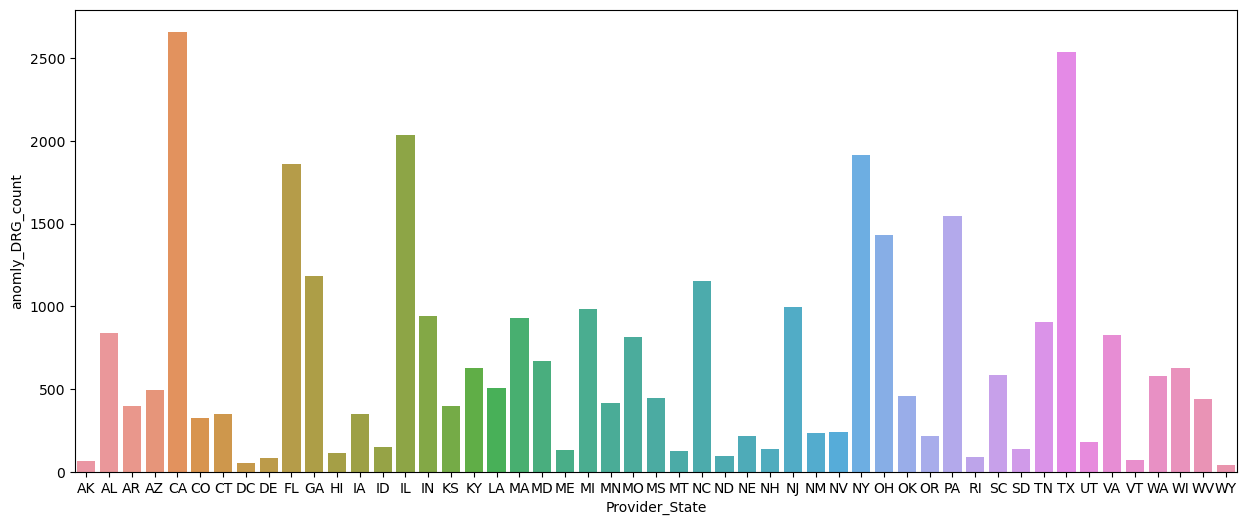

In [43]:
# Using one hot encoding to create new feature
df_new['anomly_DRG_count'] = (df_new['City_DRG_Count'] > df_new['avg_State_DRG_Count']).astype(int)

anomly_DRG_count = df_new.groupby('Provider_State')['anomly_DRG_count'].sum().reset_index()
anomly_DRG_count.columns = ['Provider_State', 'anomly_DRG_count']

plt.figure(figsize= (15,6))
sns.barplot(x = 'Provider_State', y = 'anomly_DRG_count', data = anomly_DRG_count)

- **Insight:** This feature reveals the count of unique Diagnosis-Related Groups (DRGs) per city. When a city displays a notably elevated number of unique DRGs, it may serve as an indicator of potential fraudulent activities.

## Section 4: Modeling <a class="anchor" id="section-4"></a>

## **Autoencoder Model**<a class="anchor" id="section-4-1"></a>

- **Description:** An Autoencoder is a type of artificial neural network designed for dimensionality reduction and feature learning. It consists of an encoder, which maps the input data into a lower-dimensional representation, and a decoder, which reconstructs the data from this lower-dimensional representation. It's an unsupervised learning technique that can be adapted for anomaly detection by comparing the input data to the reconstructed output. Anomalies often result in higher reconstruction errors, making them stand out from normal data.


- **Use in Anomaly Detection:** Autoencoders are used in anomaly detection by training the model to learn the normal data distribution. Unusually high reconstruction errors suggest anomalous data points. The threshold for reconstruction error is a key parameter for identifying anomalies.

> Prepare dataframe for modeling

In [44]:
selected_features = ['Total_Discharges','Average_Total_Payments','Average_Medicare_Payment',
                     'anomly_state_avg_payment','anomly_state_drg_avg_payment',
                     'anomly_zip_drg_avg_payment','anomly_drg_freq','anomly_discharge',
                     'anomly_drg_type','anomly_payment_std','anomly_payment_per_discharge',
                     'Discharge_to_DRG_Ratio_Provider','Discharge_to_DRG_Ratio_State',
                     'anomly_Discharge_DRG_ratio','anomly_DRG_count']

In [45]:
df_model_auto = df_new[selected_features]

In [46]:
df_model_auto.head()

Total_Discharges  Average_Total_Payments  Average_Medicare_Payment  \
0                91                 5777.24                   4763.73   
1                14                 5787.57                   4976.71   
2                24                 5434.95                   4453.79   
3                25                 5417.56                   4129.16   
4                18                 5658.33                   4851.44   

   anomly_state_avg_payment  anomly_state_drg_avg_payment  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             0   
4                         0                             0   

   anomly_zip_drg_avg_payment  anomly_drg_freq  anomly_discharge  \
0                           0                1                 1   
1                           0                0                 0   
2                           0                0                 0   
3                           0                0                 0   
4                           0                0                 0   

   anomly_drg_type  anomly_payment_std  anomly_payment_per_discharge  \
0                0                   1                             0   
1                0                   0                             1   
2                0                   1                             1   
3                0                   1                             1   
4                0                   0                             1   

   Discharge_to_DRG_Ratio_Provider  Discharge_to_DRG_Ratio_State  \
0                         0.989130                          4.55   
1                         0.285714                          0.70   
2                         0.279070                          1.20   
3                         0.287356                          1.25   
4                         0.225000                          0.90   

   anomly_Discharge_DRG_ratio  anomly_DRG_count  
0                           0                 0  
1                           0                 0  
2                           0                 1  
3                           0                 1  
4                           0                 0

In [47]:
df_model_auto.isna().sum()

Total_Discharges                   0
Average_Total_Payments             0
Average_Medicare_Payment           0
anomly_state_avg_payment           0
anomly_state_drg_avg_payment       0
anomly_zip_drg_avg_payment         0
anomly_drg_freq                    0
anomly_discharge                   0
anomly_drg_type                    0
anomly_payment_std                 0
anomly_payment_per_discharge       0
Discharge_to_DRG_Ratio_Provider    0
Discharge_to_DRG_Ratio_State       0
anomly_Discharge_DRG_ratio         0
anomly_DRG_count                   0
dtype: int64

In [48]:
x = df_model_auto.loc[:,:]

> Standardize

In [49]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x, columns=selected_features)
x.head()

Total_Discharges  Average_Total_Payments  Average_Medicare_Payment  \
0          0.943640               -0.512776                 -0.510403   
1         -0.563094               -0.511428                 -0.481265   
2         -0.367414               -0.557435                 -0.552805   
3         -0.347846               -0.559703                 -0.597218   
4         -0.484822               -0.528290                 -0.498403   

   anomly_state_avg_payment  anomly_state_drg_avg_payment  \
0                 -0.267761                     -0.246715   
1                 -0.267761                     -0.246715   
2                 -0.267761                     -0.246715   
3                 -0.267761                     -0.246715   
4                 -0.267761                     -0.246715   

   anomly_zip_drg_avg_payment  anomly_drg_freq  anomly_discharge  \
0                   -0.010211         1.294504          1.521824   
1                   -0.010211        -0.772497         -0.657106   
2                   -0.010211        -0.772497         -0.657106   
3                   -0.010211        -0.772497         -0.657106   
4                   -0.010211        -0.772497         -0.657106   

   anomly_drg_type  anomly_payment_std  anomly_payment_per_discharge  \
0        -0.174152            1.164513                     -1.246594   
1        -0.174152           -0.858728                      0.802186   
2        -0.174152            1.164513                      0.802186   
3        -0.174152            1.164513                      0.802186   
4        -0.174152           -0.858728                      0.802186   

   Discharge_to_DRG_Ratio_Provider  Discharge_to_DRG_Ratio_State  \
0                         0.039150                      1.034087   
1                        -0.092123                     -0.268454   
2                        -0.093363                     -0.099293   
3                        -0.091817                     -0.082377   
4                        -0.103454                     -0.200789   

   anomly_Discharge_DRG_ratio  anomly_DRG_count  
0                   -0.527456         -0.508953  
1                   -0.527456         -0.508953  
2                   -0.527456          1.964816  
3                   -0.527456          1.964816  
4                   -0.527456         -0.508953

> Split Train and Test data
- We do not need the target variable to train the unsupervised learning model. So I set no target variable and split my features into train and test set acorrdingly.

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(x, test_size=0.3, random_state=123)

In [51]:
x_train.shape

(114145, 15)

In [52]:
x_train.head()

Total_Discharges  Average_Total_Payments  Average_Medicare_Payment  \
99570          0.043513               -0.657308                 -0.629792   
91199          0.591417               -0.667751                 -0.653892   
43090         -0.465254               -0.362590                 -0.400775   
26898         -0.132599                0.995124                  0.918698   
85777         -0.445686               -0.699744                 -0.694846   

       anomly_state_avg_payment  anomly_state_drg_avg_payment  \
99570                 -0.267761                     -0.246715   
91199                 -0.267761                     -0.246715   
43090                 -0.267761                     -0.246715   
26898                 -0.267761                      4.053261   
85777                 -0.267761                     -0.246715   

       anomly_zip_drg_avg_payment  anomly_drg_freq  anomly_discharge  \
99570                   -0.010211         1.294504          1.521824   
91199                   -0.010211         1.294504          1.521824   
43090                   -0.010211        -0.772497         -0.657106   
26898                   -0.010211        -0.772497         -0.657106   
85777                   -0.010211        -0.772497         -0.657106   

       anomly_drg_type  anomly_payment_std  anomly_payment_per_discharge  \
99570        -0.174152           -0.858728                     -1.246594   
91199        -0.174152           -0.858728                      0.802186   
43090        -0.174152           -0.858728                     -1.246594   
26898        -0.174152           -0.858728                      0.802186   
85777        -0.174152           -0.858728                      0.802186   

       Discharge_to_DRG_Ratio_Provider  Discharge_to_DRG_Ratio_State  \
99570                        -0.093022                     -0.166957   
91199                        -0.112988                     -0.144402   
43090                        -0.013253                      0.346792   
26898                         0.049472                     -0.318207   
85777                        -0.089962                     -0.437615   

       anomly_Discharge_DRG_ratio  anomly_DRG_count  
99570                   -0.527456         -0.508953  
91199                   -0.527456         -0.508953  
43090                   -0.527456         -0.508953  
26898                    1.895894         -0.508953  
85777                    1.895894         -0.508953

In [53]:
x_test.shape

(48920, 15)

In [54]:
x_test.head()

Total_Discharges  Average_Total_Payments  Average_Medicare_Payment  \
90466          -0.445686               -0.203118                 -0.151358   
43368          -0.367414                0.197013                  0.295281   
158001         -0.250007               -0.342492                 -0.294158   
78282           1.550248               -0.659476                 -0.667510   
43817          -0.445686               -0.607326                 -0.578203   

        anomly_state_avg_payment  anomly_state_drg_avg_payment  \
90466                  -0.267761                     -0.246715   
43368                  -0.267761                      4.053261   
158001                 -0.267761                     -0.246715   
78282                  -0.267761                     -0.246715   
43817                  -0.267761                     -0.246715   

        anomly_zip_drg_avg_payment  anomly_drg_freq  anomly_discharge  \
90466                    -0.010211        -0.772497         -0.657106   
43368                    -0.010211        -0.772497         -0.657106   
158001                   -0.010211         1.294504         -0.657106   
78282                    -0.010211         1.294504          1.521824   
43817                    -0.010211        -0.772497         -0.657106   

        anomly_drg_type  anomly_payment_std  anomly_payment_per_discharge  \
90466         -0.174152           -0.858728                     -1.246594   
43368         -0.174152            1.164513                      0.802186   
158001        -0.174152           -0.858728                     -1.246594   
78282         -0.174152           -0.858728                      0.802186   
43817         -0.174152           -0.858728                      0.802186   

        Discharge_to_DRG_Ratio_Provider  Discharge_to_DRG_Ratio_State  \
90466                         -0.090674                      0.636558   
43368                         -0.079702                      0.301489   
158001                         5.297694                     23.177284   
78282                         -0.087384                     -0.397631   
43817                         -0.108786                     -0.367444   

        anomly_Discharge_DRG_ratio  anomly_DRG_count  
90466                    -0.527456         -0.508953  
43368                    -0.527456         -0.508953  
158001                   -0.527456         -0.508953  
78282                    -0.527456         -0.508953  
43817                    -0.527456         -0.508953

### Model 1<a class="anchor" id="section-4-1-1"></a>

> My first Autoencoder model is clf1 model which has hidden_neurons = [15, 2, 2, 15]
- The number of the hidden layers and the number of neutrons in a hidden layer: if there are too many hidden layers or too many neutrons, the model tends to overfit; otherwise the model tends to underfit.

In [55]:
from pyod.models.auto_encoder import AutoEncoder

# Create the AutoEncoder model with [15, 2, 2, 15] architecture
clf1 = AutoEncoder(hidden_neurons=[15, 2, 2, 15])

# Train the AutoEncoder model using the training data
clf1.fit(x_train)

2023-11-08 18:55:44.409285: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                240       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 15)                240       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 3

3211/3211 [==============================] - 5s 2ms/step - loss: 1.0059 - val_loss: 0.9469
Epoch 60/100
3211/3211 [==============================] - 5s 2ms/step - loss: 1.0059 - val_loss: 0.9469
Epoch 61/100
3211/3211 [==============================] - 5s 2ms/step - loss: 1.0059 - val_loss: 0.9469
Epoch 62/100
3211/3211 [==============================] - 5s 2ms/step - loss: 1.0059 - val_loss: 0.9469
Epoch 63/100
3211/3211 [==============================] - 5s 2ms/step - loss: 1.0059 - val_loss: 0.9469
Epoch 64/100
3211/3211 [==============================] - 5s 2ms/step - loss: 1.0059 - val_loss: 0.9469
Epoch 65/100
3211/3211 [==============================] - 5s 2ms/step - loss: 1.0059 - val_loss: 0.9469
Epoch 66/100
3211/3211 [==============================] - 5s 2ms/step - loss: 1.0059 - val_loss: 0.9469
Epoch 67/100
3211/3211 [==============================] - 5s 2ms/step - loss: 1.0059 - val_loss: 0.9469
Epoch 68/100
3211/3211 [==============================] - 5s 2ms/step - loss:

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[15, 2, 2, 15],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7fa4afe3a1f0>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

> Outlier scores
- The function "decision_functions()" is used to make predictions about outliers in a dataset. In this context, a higher score indicates that a data point is more likely to be abnormal or an outlier.

In [56]:
y_train_scores = clf1.decision_scores_ 
y_train_scores

array([2.80732987, 2.71357389, 2.16091291, ..., 2.98577725, 2.46418576,
       7.44556514])

In [57]:
y_train_scores = clf1.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf1.predict(x_test)  # outlier labels (0 or 1)

# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf1.decision_function(x_test)  # outlier scores

y_test_pred = pd.Series(y_test_pred)
y_test_scores = pd.Series(y_test_scores)

1529/1529 [==============================] - 1s 904us/step


In [58]:
y_test_pred.value_counts()

0    44003
1     4917
dtype: int64

- To identify outliers, we can use a threshold of 8. Data points with scores greater than or equal to 8 can be considered as outliers. This threshold allows us to distinguish and label data points that exhibit significant deviations from the norm.


- Set a threshold to be 8, and mark it as red

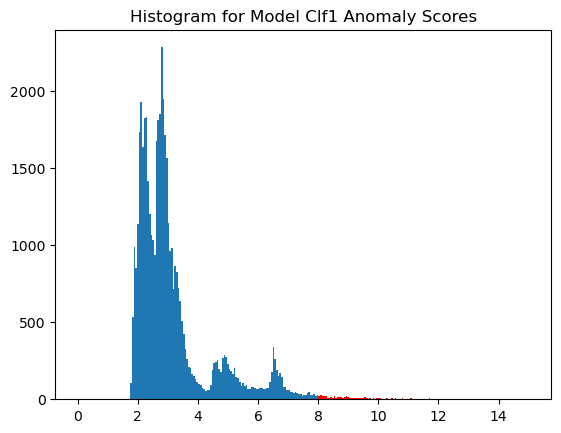

In [59]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(y_test_scores, bins='auto', range=(0,15))
condition = 8
for i, bin_val in enumerate(bins[:-1]):
    if bin_val > condition:
        patches[i].set_facecolor('red')

plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

> I will identify the outliers as a cluster and demonstrate the X attributes

In [60]:
df_test = x_test.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']>8, 1, 0)
df_test['cluster'].value_counts()

0    48685
1      235
Name: cluster, dtype: int64

> Describe the outliers
- I recommend observations in Cluster 1 to be outliers.

In [61]:
df_test.groupby('cluster').mean()

Total_Discharges  Average_Total_Payments  Average_Medicare_Payment  \
cluster                                                                       
0                0.006560               -0.001476                 -0.001983   
1                0.050758                0.026308                  0.031494   

         anomly_state_avg_payment  anomly_state_drg_avg_payment  \
cluster                                                           
0                       -0.000823                      0.003414   
1                       -0.046350                      0.082645   

         anomly_zip_drg_avg_payment  anomly_drg_freq  anomly_discharge  \
cluster                                                                  
0                         -0.006187         0.007389          0.008321   
1                         -0.010211        -0.016062          0.121745   

         anomly_drg_type  anomly_payment_std  anomly_payment_per_discharge  \
cluster                                                                      
0               0.005457            0.008292                     -0.004070   
1              -0.048274           -0.049432                      0.078574   

         Discharge_to_DRG_Ratio_Provider  Discharge_to_DRG_Ratio_State  \
cluster                                                                  
0                              -0.002518                      0.001833   
1                              -0.025756                     -0.042967   

         anomly_Discharge_DRG_ratio  anomly_DRG_count      score  
cluster                                                           
0                          0.002511          0.002873   3.121137  
1                          0.080960         -0.108940  10.971844

### Model 2<a class="anchor" id="section-4-1-2"></a>

> **Model2** is clf2 model which has hidden_neurons = [15, 8, 2, 8, 15]

In [62]:
from pyod.models.auto_encoder import AutoEncoder

# Create the AutoEncoder model with [15, 8, 2, 8, 15] architecture
clf2 = AutoEncoder(hidden_neurons=[15, 8, 2, 8, 15])

# Train the AutoEncoder model using the training data
clf2.fit(x_train)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 15)                240       
                                                                 
 dropout_6 (Dropout)         (None, 15)                0         
                                                                 
 dense_8 (Dense)             (None, 15)                240       
                                                                 
 dropout_7 (Dropout)         (None, 15)                0         
                                                                 
 dense_9 (Dense)             (None, 15)                240       
                                                                 
 dropout_8 (Dropout)         (None, 15)                0         
                                                                 
 dense_10 (Dense)            (None, 8)                

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[15, 8, 2, 8, 15],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7fa4afe3a1f0>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

> Outlier scores
- The function "decision_functions()" is used to make predictions about outliers in a dataset. In this context, a higher score indicates that a data point is more likely to be abnormal or an outlier.

In [63]:
y_train_scores = clf2.decision_scores_ 
y_train_scores

array([2.8072727 , 2.7136353 , 2.1606318 , ..., 2.98576488, 2.46411272,
       7.44568579])

In [64]:
y_train_scores = clf2.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf2.predict(x_test)  # outlier labels (0 or 1)

# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf2.decision_function(x_test)  # outlier scores

y_test_pred = pd.Series(y_test_pred)
y_test_scores = pd.Series(y_test_scores)

1529/1529 [==============================] - 1s 880us/step


In [65]:
y_test_pred.value_counts()

0    44003
1     4917
dtype: int64

- To identify outliers, we can use a threshold of 8. Data points with scores greater than or equal to 8 can be considered as outliers. This threshold allows us to distinguish and label data points that exhibit significant deviations from the norm.


- Set a threshold to be 8, and mark it as red

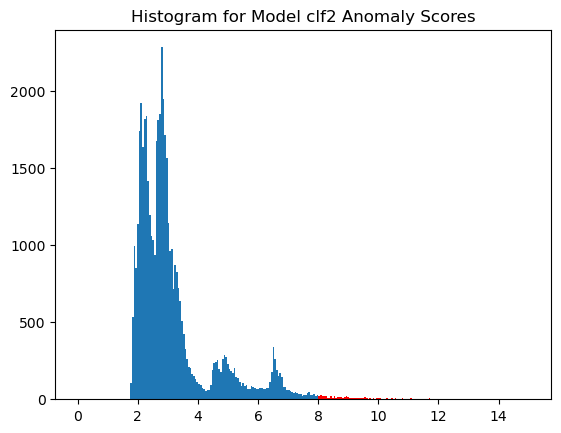

In [66]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(y_test_scores, bins='auto', range=(0,15))
condition = 8
for i, bin_val in enumerate(bins[:-1]):
    if bin_val > condition:
        patches[i].set_facecolor('red')

plt.title("Histogram for Model clf2 Anomaly Scores")
plt.show()

> I will identify the outliers as a cluster and demonstrate the X attributes

In [67]:
df_test = x_test.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']>8, 1, 0)
df_test['cluster'].value_counts()

0    48685
1      235
Name: cluster, dtype: int64

> Describe the outliers
- I recommend observations in Cluster 1 to be outliers.

In [68]:
df_test.groupby('cluster').mean()

Total_Discharges  Average_Total_Payments  Average_Medicare_Payment  \
cluster                                                                       
0                0.006560               -0.001476                 -0.001983   
1                0.050758                0.026308                  0.031494   

         anomly_state_avg_payment  anomly_state_drg_avg_payment  \
cluster                                                           
0                       -0.000823                      0.003414   
1                       -0.046350                      0.082645   

         anomly_zip_drg_avg_payment  anomly_drg_freq  anomly_discharge  \
cluster                                                                  
0                         -0.006187         0.007389          0.008321   
1                         -0.010211        -0.016062          0.121745   

         anomly_drg_type  anomly_payment_std  anomly_payment_per_discharge  \
cluster                                                                      
0               0.005457            0.008292                     -0.004070   
1              -0.048274           -0.049432                      0.078574   

         Discharge_to_DRG_Ratio_Provider  Discharge_to_DRG_Ratio_State  \
cluster                                                                  
0                              -0.002518                      0.001833   
1                              -0.025756                     -0.042967   

         anomly_Discharge_DRG_ratio  anomly_DRG_count      score  
cluster                                                           
0                          0.002511          0.002873   3.121113  
1                          0.080960         -0.108940  10.971931

### Aggregating Multiple Models using Average Method<a class="anchor" id="section-4-1-3"></a>

> Achieve Model Stability by Aggregating Multiple Models using Average Method
- Unsupervised techniques can detect many outliers. But due to its unspervised nature it is not stable, meaning overfitting to a specific dataset. So I will implement the average scores of all detectors to train multiple models then aggregate the scores.

In [69]:
from pyod.models.combination import aom, moa, average, maximization

# Put all the predictions in a data frame
train_scores = pd.DataFrame({'clf1': clf1.decision_scores_,
                             'clf2': clf2.decision_scores_
                            })


test_scores  = pd.DataFrame({'clf1': clf1.decision_function(x_test),
                             'clf2': clf2.decision_function(x_test)
                            })

1529/1529 [==============================] - 1s 866us/step


In [70]:
train_scores.head()

clf1      clf2
0  2.807330  2.807273
1  2.713574  2.713635
2  2.160913  2.160632
3  4.986627  4.986682
4  2.797647  2.797608

In [71]:
test_scores.head()

clf1       clf2
0   2.183352   2.183091
1   4.537075   4.537099
2  25.739187  25.739213
3   3.107005   3.107094
4   2.041584   2.041392

> Standardization for the decision scores

In [72]:
from pyod.utils.utility import standardizer
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

In [73]:
# Combination by average
y_by_average = average(test_scores_norm)
y_by_average[1:10]

array([ 0.61101407, 10.67118804, -0.06752322, -0.57312085,  1.21968335,
       -0.54981318, -0.18274052, -0.5162115 , -0.24597517])

> Set a threshold to be 3, and mark it as red

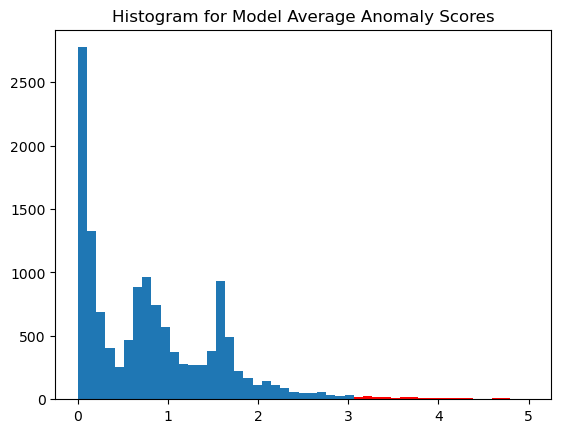

In [74]:
# Combination by average
y_by_average = average(test_scores_norm)

import matplotlib.pyplot as plt

n, bins, patches = plt.hist(y_by_average, bins='auto', range=(0,5))
condition = 3
for i, bin_val in enumerate(bins[:-1]):
    if bin_val > condition:
        patches[i].set_facecolor('red')

plt.title("Histogram for Model Average Anomaly Scores")
plt.show()

> We can identify those >=3 as the outliers

In [75]:
df_test = pd.DataFrame(x_test)
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']>3, 1, 0)
df_test['y_by_average_cluster'].value_counts()

0    48576
1      344
Name: y_by_average_cluster, dtype: int64

> Create a table for normal and anomaly groups of Test Data to Describe the outliers

In [76]:
threshold = 3

def descriptive_stat_threshold(df_model,x_test_scores, threshold):
    df = pd.DataFrame(df_model)
    df['Anomaly_Score'] = x_test_scores
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100
    stat = df.groupby('Group').mean().round(2).reset_index()
    stat = cnt.merge(stat, left_on='Group',right_on='Group')
    return (stat)

descriptive_stat_threshold(df_test,y_by_average, threshold)

Group  Count    Count %  Total_Discharges  Average_Total_Payments  \
0   Normal  48576  99.296811             -0.01                   -0.03   
1  Outlier    344   0.703189              2.57                    3.54   

   Average_Medicare_Payment  anomly_state_avg_payment  \
0                     -0.03                     -0.01   
1                      3.47                      1.72   

   anomly_state_drg_avg_payment  anomly_zip_drg_avg_payment  anomly_drg_freq  \
0                         -0.00                       -0.01             0.01   
1                          0.75                        0.56             0.22   

   ...  anomly_drg_type  anomly_payment_std  anomly_payment_per_discharge  \
0  ...             0.00                0.01                         -0.00   
1  ...             0.72                0.24                         -0.37   

   Discharge_to_DRG_Ratio_Provider  Discharge_to_DRG_Ratio_State  \
0                            -0.02                         -0.03   
1                             1.81                          3.96   

   anomly_Discharge_DRG_ratio  anomly_DRG_count  y_by_average_score  \
0                        0.00              0.00               -0.04   
1                        0.02              0.28                5.52   

   y_by_average_cluster  Anomaly_Score  
0                   0.0          -0.04  
1                   1.0           5.52  

[2 rows x 21 columns]

**Summary:**

- To enhance the stability of our model for identifying outliers, I employed an approach that involved averaging scores from multiple detectors. I trained two Autoencoding models using the average scores from all detectors and aggregated these scores, resulting in a more refined anomaly detection process. Our first model consisted of two hidden layers, each containing 2 neurons, while the second model had three hidden layers, with 8 neurons in the first and third layers and 2 neurons in the middle layer. I averaged the prediction scores from both models and normalized them. Using a histogram with auto binning, I set a threshold of 3 to differentiate normal data, which numbered 48,576, from 344 identified outliers.


- Furthermore, I created a table that separated the test data into normal and anomaly groups. This table revealed that the normal group had an anomaly score of -0.04, while the outlier group had an anomaly score of 5.52. Compared to our previous model, this approach increased the score gap betIen the normal and outlier groups, providing improved discrimination for identifying outliers in the dataset.

**Feature Explore:** 
- `anomly_state_avg_payment`: In the table, it is evident that the 'normal' group exhibits lower values in this regard, whereas the 'outlier' group displays higher values. This discrepancy highlights that the 'outlier' group reports the average payment level by state, indicating potential irregularities within the states, while the 'normal' group adheres to more expected patterns. When a state presents an unusually high average amount of payment, it triggers concerns about potential unbundling practices carried out by healthcare providers within that state. 

- `Discharge_to_DRG_Ratio_Provider`: As observed in the table, it's clear that the group considered 'normal' demonstrates lower values near zero for the discharge-to-DRG ratio per provider, whereas the 'outlier' group exhibits higher values. This suggests that the outlier group has a discharge-to-DRG ratio per provider that surpasses the average, serving as an indicator of an anomaly. Such anomalies could be indicative of providers potentially involved in fraudulent practices, such as upcoding, where they change a standard diagnosis to a more severe one, resulting in higher costs for patients with common illnesses.

- `Discharge_to_DRG_Ratio_State`: To detect potential fraudulent activities, we calculate this ratio and assess whether providers report a higher frequency of specific Diagnosis Related Groups (DRGs) than the state average, indicating deviations from expected patterns. It's noteworthy that the outlier group consistently shows lower values for this metric, while the normal group consistently exhibits high values, implying that the outlier group's discharge-to-DRG ratios per provider are notably elevated, potentially signaling irregularities like upcoding and the subsequent increase in costs for patients with standard medical conditions.

## **iForest Model**<a class="anchor" id="section-4-2"></a>

- **Description:** Isolation Forest is an ensemble machine learning algorithm for anomaly detection. It works on the principle of isolating anomalies instead of profiling normal data. The algorithm randomly selects a feature and a split value and uses these to partition the dataset. Anomalies are more likely to be isolated in smaller partitions with fewer splits, making them stand out. This algorithm is particularly useful when dealing with high-dimensional data.


- **Use in Anomaly Detection:** Isolation Forest identifies anomalies by measuring how quickly a data point is isolated. Data points that are isolated more quickly are considered anomalies. Anomalies have shorter paths in the tree-like structure generated by the algorithm.

> Prepare dataframe for modeling

In [77]:
selected_features = ['Average_Total_Payments', 'Charge_Upper_Fence_State',
                     'Charge_Upper_Fence_State_drg', 'state_avg_drg_frq',
                     'Provider_Payment_Standard_Deviation', 'Region_Payment_Standard_Deviation',
                     'Payment_per_Discharge_State']

In [78]:
df_model_if = df_new[selected_features]

In [79]:
df_model_if.head()

Average_Total_Payments  Charge_Upper_Fence_State  \
0                 5777.24                 15842.385   
1                 5787.57                 15842.385   
2                 5434.95                 15842.385   
3                 5417.56                 15842.385   
4                 5658.33                 15842.385   

   Charge_Upper_Fence_State_drg  state_avg_drg_frq  \
0                      6611.905          38.217391   
1                      6611.905          38.217391   
2                      6611.905          38.217391   
3                      6611.905          38.217391   
4                      6611.905          38.217391   

   Provider_Payment_Standard_Deviation  Region_Payment_Standard_Deviation  \
0                          6038.338768                        4612.285731   
1                          2717.731770                        5410.640598   
2                          5630.866929                        5410.640598   
3                          5546.045094                        5410.640598   
4                          4550.105983                        5410.640598   

   Payment_per_Discharge_State  
0                   150.287907  
1                   150.287907  
2                   150.287907  
3                   150.287907  
4                   150.287907

In [80]:
df_model_if = df_model_if.fillna(0)
df_model_if.isna().sum()

Average_Total_Payments                 0
Charge_Upper_Fence_State               0
Charge_Upper_Fence_State_drg           0
state_avg_drg_frq                      0
Provider_Payment_Standard_Deviation    0
Region_Payment_Standard_Deviation      0
Payment_per_Discharge_State            0
dtype: int64

In [81]:
X = df_model_if.drop('Average_Total_Payments', axis = 1)
y = df_model_if['Average_Total_Payments']

> Standardize

In [82]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=selected_features[1:])
X.head()

Charge_Upper_Fence_State  Charge_Upper_Fence_State_drg  state_avg_drg_frq  \
0                 -1.618878                      -0.62676          -0.163435   
1                 -1.618878                      -0.62676          -0.163435   
2                 -1.618878                      -0.62676          -0.163435   
3                 -1.618878                      -0.62676          -0.163435   
4                 -1.618878                      -0.62676          -0.163435   

   Provider_Payment_Standard_Deviation  Region_Payment_Standard_Deviation  \
0                            -0.248744                          -1.639017   
1                            -1.475389                          -1.150177   
2                            -0.399266                          -1.150177   
3                            -0.430599                          -1.150177   
4                            -0.798503                          -1.150177   

   Payment_per_Discharge_State  
0                    -0.490423  
1                    -0.490423  
2                    -0.490423  
3                    -0.490423  
4                    -0.490423

> Split Train and Test data
- We do not need the target variable to train the unsupervised learning model. So I set no target variable and split my features into train and test set acorrdingly.

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [84]:
x_train.shape

(109253, 6)

In [85]:
x_train.head()

Charge_Upper_Fence_State  Charge_Upper_Fence_State_drg  \
112441                  1.468306                      0.201755   
39785                  -0.610165                     -0.522928   
47400                   0.036329                     -0.156382   
152553                 -0.653874                      1.424209   
53305                  -0.664819                     -0.206111   

        state_avg_drg_frq  Provider_Payment_Standard_Deviation  \
112441           1.481713                             1.447240   
39785            0.939741                            -0.015754   
47400           -0.330477                             0.977462   
152553          -0.604684                             0.587918   
53305            0.905797                             1.540334   

        Region_Payment_Standard_Deviation  Payment_per_Discharge_State  
112441                           0.444810                    -0.679159  
39785                            0.129861                     4.805863  
47400                           -0.464821                    -0.670527  
152553                           1.059825                    -0.540393  
53305                            1.764296                     0.914547

In [86]:
x_test.shape

(53812, 6)

In [87]:
x_test.head()

Charge_Upper_Fence_State  Charge_Upper_Fence_State_drg  \
90466                  -0.231706                     -0.422836   
43368                   0.402323                     -0.266084   
158001                  0.686690                     -0.325088   
78282                   0.062456                     -0.550377   
43817                   0.036329                     -0.370512   

        state_avg_drg_frq  Provider_Payment_Standard_Deviation  \
90466            0.214952                            -0.726530   
43368           -0.143346                            -0.118552   
158001          -0.488897                            -1.974052   
78282            1.388648                            -1.546776   
43817           -0.493876                             0.754643   

        Region_Payment_Standard_Deviation  Payment_per_Discharge_State  
90466                           -0.600283                     0.153540  
43368                           -1.156850                     0.733630  
158001                          -0.582023                    -0.863961  
78282                           -0.949308                    -0.726232  
43817                            1.764296                     2.323009

### Model 1<a class="anchor" id="section-4-2-1"></a>

> My first Isolation Forest model is IF_clf1 model which Model 1 with max_samples = 5000

In [88]:
from pyod.models.iforest import IForest
IF_clf1 = IForest(behaviour="new", max_samples=5000) 
IF_clf1.fit(x_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=5000, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

> Anomaly score for each observation in the training dataset `x_train`

In [89]:
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
# We apply the model to the test data X_test to get the outlier scores.
y_test_scores = IF_clf1.decision_function(x_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)
y_test_scores.head()

0   -0.103813
1   -0.069078
2   -0.024724
3   -0.054676
4   -0.035248
dtype: float64

> To identify outliers, we can use a threshold of 0.1. Data points with scores greater than or equal to 0.1 can be considered as outliers. This threshold allows us to distinguish and label data points that exhibit significant deviations from the norm.

- Set a threshold to be 0.1, and mark it as red

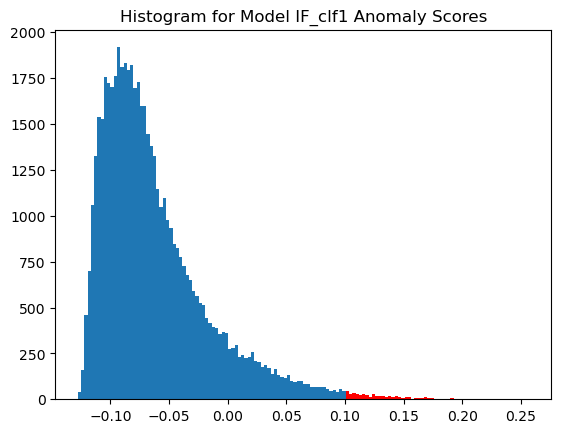

In [90]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(y_test_scores, bins='auto')
condition = 0.1
for i, bin_val in enumerate(bins[:-1]):
    if bin_val > condition:
        patches[i].set_facecolor('red')

plt.title("Histogram for Model IF_clf1 Anomaly Scores")
plt.show() 

> We can identify those >=0.1 as the outliers

In [91]:
x_test_cluster = x_test.copy()
x_test_cluster['distance'] = y_test_scores
x_test_cluster['cluster'] = np.where(x_test_cluster['distance']>0.1, 1, 0)
x_test_cluster['cluster'].value_counts()

0    53648
1      164
Name: cluster, dtype: int64

> We recommend observations in Cluster 1 to be outliers. The average "distance" indicates the distances of those points in Cluster 1. The distance of Cluster 1 is higher than that of Cluster 0, meaning points in Cluster 1 are far away from other points.

In [92]:
x_test_cluster.groupby('cluster').mean()

Charge_Upper_Fence_State  Charge_Upper_Fence_State_drg  \
cluster                                                           
0                       -0.001241                     -0.002176   
1                        0.336232                      0.108173   

         state_avg_drg_frq  Provider_Payment_Standard_Deviation  \
cluster                                                           
0                 0.006572                             0.006123   
1                -0.034724                            -0.054732   

         Region_Payment_Standard_Deviation  Payment_per_Discharge_State  \
cluster                                                                   
0                                 0.002851                    -0.002659   
1                                -0.169388                     0.016207   

         distance  
cluster            
0       -0.064015  
1        0.132294

> Create a table for normal and anomaly groups of Test Data to Describe the outliers

In [93]:
threshold = 0.1

def descriptive_stat_threshold(df_model,x_test_scores, threshold):
    df = pd.DataFrame(df_model)
    df['Anomaly_Score'] = x_test_scores
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100
    stat = df.groupby('Group').mean().round(2).reset_index()
    stat = cnt.merge(stat, left_on='Group',right_on='Group')
    return (stat)

descriptive_stat_threshold(x_test,y_test_scores, threshold)

Group  Count    Count %  Charge_Upper_Fence_State  \
0   Normal  17673  99.080563                      0.30   
1  Outlier    164   0.919437                     -0.15   

   Charge_Upper_Fence_State_drg  state_avg_drg_frq  \
0                          0.03              -0.05   
1                         -0.02               0.03   

   Provider_Payment_Standard_Deviation  Region_Payment_Standard_Deviation  \
0                                 0.01                               -0.0   
1                                 0.00                                0.0   

   Payment_per_Discharge_State  Anomaly_Score  
0                         0.06          -0.06  
1                        -0.03           0.13

### Model 2<a class="anchor" id="section-4-2-2"></a>

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

> IF_clf2 model which Model 2 with max_samples = 2500

In [95]:
from pyod.models.iforest import IForest
IF_clf2 = IForest(behaviour="new", max_samples=2500) 
IF_clf2.fit(x_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=2500, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

> Anomaly score for each observation in the training dataset `x_train`

In [96]:
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
# We apply the model to the test data X_test to get the outlier scores.
y_test_scores = IF_clf2.decision_function(x_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)
y_test_scores.head()

0   -0.107511
1   -0.087456
2   -0.039932
3   -0.060411
4   -0.032837
dtype: float64

> To identify outliers, we can use a threshold of 0.1. Data points with scores greater than or equal to 0.1 can be considered as outliers. This threshold allows us to distinguish and label data points that exhibit significant deviations from the norm.

- Set a threshold to be 0.1, and mark it as red

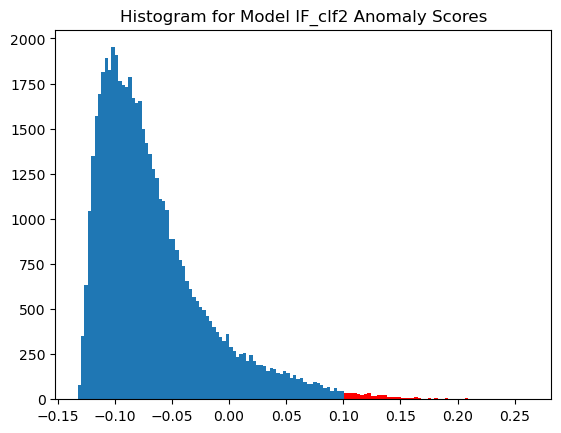

In [97]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(y_test_scores, bins='auto')
condition = 0.1
for i, bin_val in enumerate(bins[:-1]):
    if bin_val > condition:
        patches[i].set_facecolor('red')

plt.title("Histogram for Model IF_clf2 Anomaly Scores")
plt.show() 

> We can identify those >=0.1 as the outliers

In [98]:
x_test_cluster = x_test.copy()
x_test_cluster['distance'] = y_test_scores
x_test_cluster['cluster'] = np.where(x_test_cluster['distance']>0.1, 1, 0)
x_test_cluster['cluster'].value_counts()

0    53637
1      175
Name: cluster, dtype: int64

> We recommend observations in Cluster 1 to be outliers. The average "distance" indicates the distances of those points in Cluster 1. The distance of Cluster 1 is higher than that of Cluster 0, meaning points in Cluster 1 are far away from other points.

In [99]:
x_test_cluster.groupby('cluster').mean()

Charge_Upper_Fence_State  Charge_Upper_Fence_State_drg  \
cluster                                                           
0                       -0.001049                     -0.001539   
1                        0.255946                     -0.094060   

         state_avg_drg_frq  Provider_Payment_Standard_Deviation  \
cluster                                                           
0                 0.006086                             0.006165   
1                 0.116815                            -0.063721   

         Region_Payment_Standard_Deviation  Payment_per_Discharge_State  \
cluster                                                                   
0                                 0.002596                    -0.002776   
1                                -0.080297                     0.050851   

         distance  
cluster            
0       -0.068228  
1        0.129285

> Create a table for normal and anomaly groups of Test Data to Describe the outliers

In [100]:
threshold = 0.1

def descriptive_stat_threshold(df_model,x_test_scores, threshold):
    df = pd.DataFrame(df_model)
    df['Anomaly_Score'] = x_test_scores
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100
    stat = df.groupby('Group').mean().round(2).reset_index()
    stat = cnt.merge(stat, left_on='Group',right_on='Group')
    return (stat)

descriptive_stat_threshold(x_test,y_test_scores, threshold)

Group  Count    Count %  Charge_Upper_Fence_State  \
0   Normal  17662  99.018893                      0.30   
1  Outlier    175   0.981107                     -0.15   

   Charge_Upper_Fence_State_drg  state_avg_drg_frq  \
0                          0.03              -0.05   
1                         -0.02               0.03   

   Provider_Payment_Standard_Deviation  Region_Payment_Standard_Deviation  \
0                                 0.01                               -0.0   
1                                 0.00                                0.0   

   Payment_per_Discharge_State  Anomaly_Score  
0                         0.06          -0.07  
1                        -0.03           0.13

### Aggregating Multiple Models using Average Method<a class="anchor" id="section-4-2-3"></a>

> Achieve Model Stability by Aggregating Multiple Models using Average Method
- Unsupervised techniques can detect many outliers. But due to its unspervised nature it is not stable, meaning overfitting to a specific dataset. So I will implement the average scores of all detectors to train multiple models then aggregate the scores.

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [102]:
from pyod.models.combination import aom, moa, average, maximization

# Put all the predictions in a data frame
train_scores = pd.DataFrame({'IF_clf1': IF_clf1.decision_scores_,
                             'IF_clf2': IF_clf2.decision_scores_
                            })


test_scores  = pd.DataFrame({'IF_clf1': IF_clf1.decision_function(x_test),
                             'IF_clf2': IF_clf2.decision_function(x_test)
                            })

In [103]:
train_scores.head()

IF_clf1   IF_clf2
0 -0.017929 -0.005992
1 -0.004416  0.038464
2 -0.104573 -0.092638
3 -0.066262 -0.064362
4 -0.039558 -0.038805

In [104]:
test_scores.head()

IF_clf1   IF_clf2
0 -0.103813 -0.107511
1 -0.069078 -0.087456
2 -0.024724 -0.039932
3 -0.054676 -0.060411
4 -0.035248 -0.032837

> Standardization for the decision scores

In [105]:
from pyod.utils.utility import standardizer
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

In [106]:
# Combination by average
y_by_average = average(test_scores_norm)
y_by_average[1:10]

array([-0.29467683,  0.6689815 ,  0.13756356,  0.62910778,  1.4652627 ,
       -0.39480092, -0.20097375,  3.18992245,  0.73679587])

> To identify outliers, we can use a threshold of 4. Data points with scores greater than or equal to 4 can be considered as outliers. This threshold allows us to distinguish and label data points that exhibit significant deviations from the norm.

- Set a threshold to be 4, and mark it as red

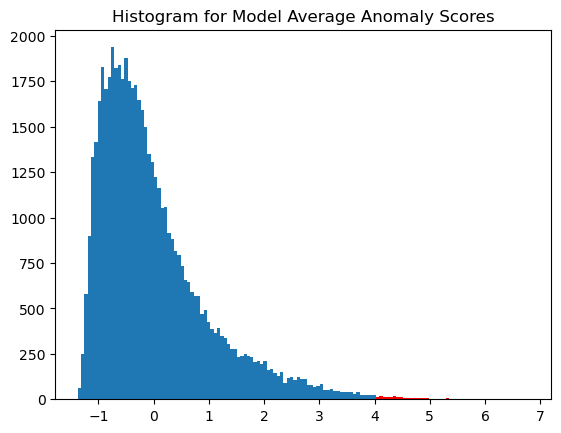

In [107]:
# Combination by average
y_by_average = average(test_scores_norm)

import matplotlib.pyplot as plt

n, bins, patches = plt.hist(y_by_average, bins='auto')
condition = 4
for i, bin_val in enumerate(bins[:-1]):
    if bin_val > condition:
        patches[i].set_facecolor('red')

plt.title("Histogram for Model Average Anomaly Scores")
plt.show()

> We can identify those >=4 as the outliers

In [108]:
df_test = pd.DataFrame(x_test)
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']>4, 1, 0)
df_test['y_by_average_cluster'].value_counts()

0    53581
1      231
Name: y_by_average_cluster, dtype: int64

> We recommend observations in Cluster 1 to be outliers. The average "score" indicates the distances of those points in Cluster 1. The distance of Cluster 1 is higher than that of Cluster 0, meaning points in Cluster 1 are far away from other points.

In [109]:
df_test.groupby('y_by_average_cluster').mean()

Charge_Upper_Fence_State  Charge_Upper_Fence_State_drg  \
y_by_average_cluster                                                           
0                                    -0.002054                     -0.011786   
1                                     0.426905                      2.305206   

                      state_avg_drg_frq  Provider_Payment_Standard_Deviation  \
y_by_average_cluster                                                           
0                              0.002011                            -0.005288   
1                              1.035384                             2.609664   

                      Region_Payment_Standard_Deviation  \
y_by_average_cluster                                      
0                                             -0.007815   
1                                              2.354540   

                      Payment_per_Discharge_State  y_by_average_score  
y_by_average_cluster                                                   
0                                       -0.010331           -0.015148  
1                                        1.790318            4.623186

> Create a table for normal and anomaly groups of Test Data to Describe the outliers

In [110]:
threshold = 4

def descriptive_stat_threshold(df_model,x_test_scores, threshold):
    df = pd.DataFrame(df_model)
    df['Anomaly_Score'] = x_test_scores
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100
    stat = df.groupby('Group').mean().round(2).reset_index()
    stat = cnt.merge(stat, left_on='Group',right_on='Group')
    return (stat)

descriptive_stat_threshold(df_test,y_by_average, threshold)

Group  Count    Count %  Charge_Upper_Fence_State  \
0   Normal  53581  99.570728                     -0.00   
1  Outlier    231   0.429272                      0.43   

   Charge_Upper_Fence_State_drg  state_avg_drg_frq  \
0                         -0.01               0.00   
1                          2.31               1.04   

   Provider_Payment_Standard_Deviation  Region_Payment_Standard_Deviation  \
0                                -0.01                              -0.01   
1                                 2.61                               2.35   

   Payment_per_Discharge_State  y_by_average_score  y_by_average_cluster  \
0                        -0.01               -0.02                   0.0   
1                         1.79                4.62                   1.0   

   Anomaly_Score  
0          -0.02  
1           4.62

**Summary:**

- In order to improve the stability of our outlier detection model, I adopted an approach that leveraged the aggregation of scores from multiple detectors. I trained two Isolation Forest (IForest) models by utilizing the average scores from all the detectors, resulting in a more precise anomaly detection process. By averaging the prediction scores from both models and applying normalization, I established a threshold of 4. This threshold enabled the differentiation of normal data, which constituted 99.57% of the dataset (53581 instances), from the 231 identified outliers, representing 0.43%.


- Additionally, I generated a table to segregate the test data into normal and anomaly groups. This analysis revealed that the normal group exhibited an anomaly score of -0.02, while the outlier group had an anomaly score of 4.62. Compared to our previous model, this approach significantly widened the score gap between the normal and outlier groups, enhancing the effectiveness of outlier identification in the dataset.

**Feature Explore:** 
- `Charge_Upper_fence_State` & `Charge_Upper_fence_State_drg`: These metrics denote the upper fence of average total charges within individual states or specific Diagnosis Related Groups (DRGs) organized by states, utilizing Tukey's boxplot fences. Notably, the **normal** group displays a lower upper fence value in comparison to the outlier group. This observation suggests that the **outlier** group tends to exhibit notably higher charges, possibly indicating the presence of unusually elevated expenses. From a business perspective, this implies that exceptionally high total payments are more likely to be classified as anomalies.

- `state_avg_drg_frq`: In the **normal** group, there is a noticeable lower frequency of visits for the same Diagnosis Related Group (DRG) within each state, while the **outlier** group demonstrates higher frequencies. Broadly, the outlier group displays an elevated frequency of visits to healthcare providers. This observation could suggest that a high frequency of hospital visits might be considered an anomaly from a business standpoint, as it may result in increased charges due to additional visits.

- `Provider_Payment_Standard_Deviation` & `Region_Payment_Standard_Deviation`: The **normal** group displays a lower standard deviation in payment amounts when contrasted with the **outlier** group. This suggests that payments within the **normal** category tend to be more consistent and fall within a narrower range, whereas the **outlier** group exhibits a greater variability in payment amounts, which may be indicative of anomalies. From a business perspective, providers who charge significantly varying amounts for the same Diagnosis Related Groups (DRGs) could potentially be linked to fraudulent activities.

- `Payment_per_Discharge_State`: The **normal** group exhibits a comparatively lower average payment amount per discharge, categorized by state, when compared to the **outlier** group. This discrepancy implies that the outlier group may encompass instances with unusually elevated payment amounts, which could be indicative of fraudulent or atypical practices. Within a business context, the detection and vigilant monitoring of cases featuring abnormally high payment amounts per discharge can aid in the identification of potential healthcare fraud, facilitating proactive intervention and preventive measures.